In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from GAN.mnist_fully_connected import (
    Generator,
    Discriminator,
    GeneratorLoss,
    DiscriminatorLoss
)

In [2]:
if torch.cuda.is_available(): device = torch.device('cuda')
elif torch.backends.mps.is_available(): device = torch.device('mps')
else: device = torch.device('cpu')
print(f'Using device: {device}')

Using device: mps


In [ ]:
seed = 41
torch.manual_seed(seed)

In [4]:
def save_plot(
        Generator: nn.Module,
        Z_noise: list[torch.Tensor],
        nrows: int,
        ncols: int,
        figsize: tuple[int, int],
        epoch: int
    ) -> None:
    if not os.path.isdir('./mnist_images'):
        os.makedirs('./mnist_images')

    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)  
    ax = ax.flatten() 
    images = [Generator(z).reshape(28, 28).detach().cpu().numpy() for z in Z_noise]
    for i in range(nrows * ncols):
        ax[i].imshow(images[i], cmap='gray')
        ax[i].axis('off')
    plt.tight_layout() 
    plt.savefig(f'./mnist_images/{epoch}_mnist.png')
    plt.close(fig)

In [5]:
def load_mnist(root: str='./mnist/', batch_size: int=256) -> tuple[DataLoader, DataLoader]:
    """
    Loads MNIST dataset and returns it as a dataloader. 
    """ 
    transform = transforms.Compose(
        [transforms.ToTensor(),                     # greyscale [0, 255] -> [0, 1]
        transforms.Lambda(lambda x: x.view(-1))])   # shape [1, 28, 28] -> [1, 784]

    mnist_train = MNIST(
        root=root,
        train=True,
        download=True,
        transform=transform)
        
    dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
    return dataloader

In [6]:
# Create generator and discriminator
G = Generator().to(device)
D = Discriminator().to(device)

# Hyperparameters
epochs = 100
batch_size = 100
lr_G = 0.002
betas_G = (0.5, 0.99)
lr_D = 0.002
betas_D = (0.5, 0.99)
verbose = True
plotting = True

# Create the optimizer and the loss
criterion_G = GeneratorLoss(maximize=True)
optimizer_G = torch.optim.Adam(params=G.parameters(), lr=lr_G, betas=betas_G, maximize=True)
criterion_D = DiscriminatorLoss()
optimizer_D = torch.optim.Adam(params=D.parameters(), lr=lr_D, betas=betas_D, maximize=True)

# Load the dataset
dataloader = load_mnist()

In [7]:
# Plot settings

figsize_1 = (8, 8)
figsize_2 = (10, 4)
nrows_1 = 4
ncols_1 = 4

Z_noise = [
    torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
    for _ in range(nrows_1*ncols_1)
]

figsize_2 = (10, 4)
nrows_2 = 2
ncols_2 = 5

epoch: 0 loss generator: -2.8858 loss discriminator: -0.9336


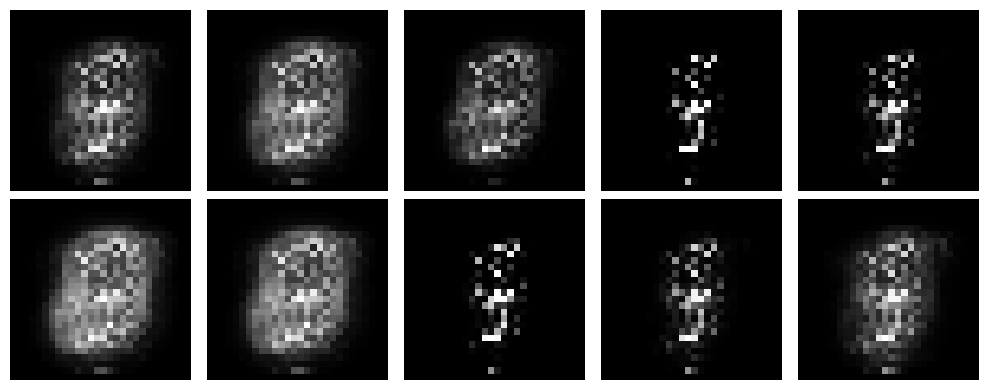

epoch: 1 loss generator: -3.3656 loss discriminator: -0.6441


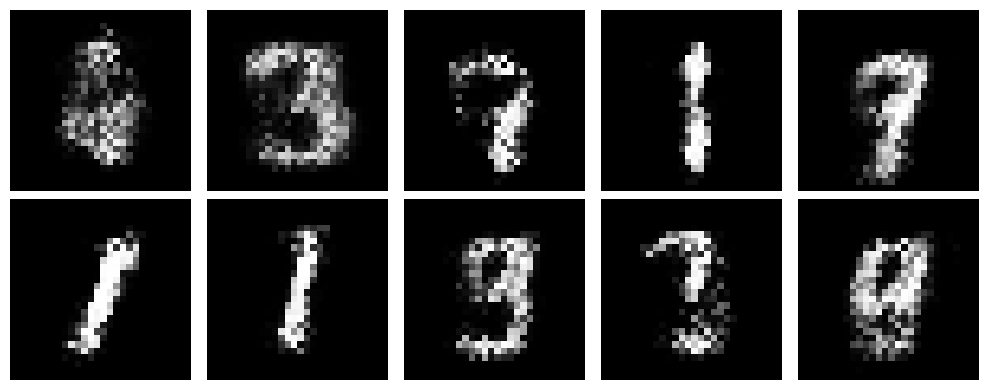

epoch: 2 loss generator: -2.4003 loss discriminator: -0.7739


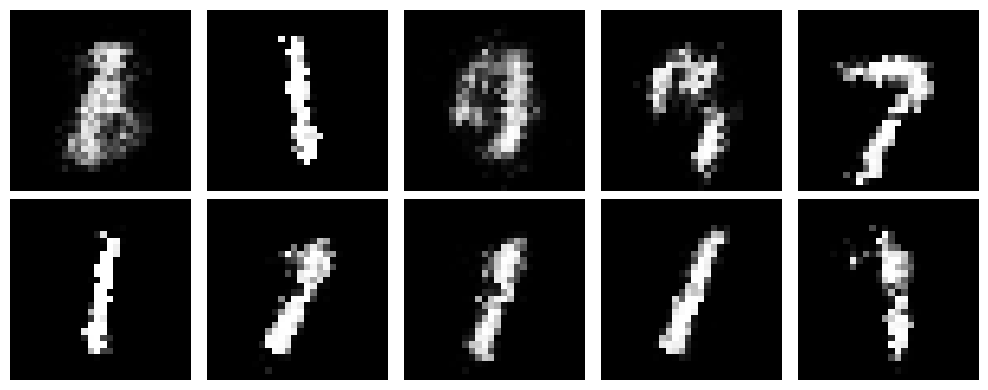

epoch: 3 loss generator: -1.9644 loss discriminator: -0.8787


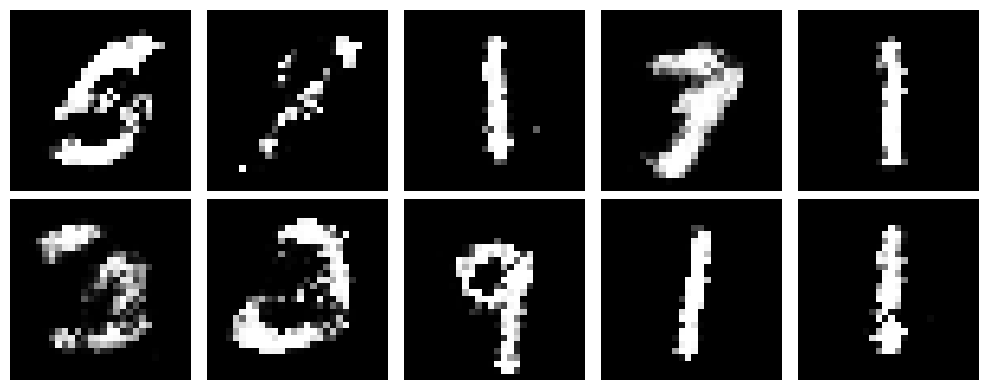

epoch: 4 loss generator: -1.5379 loss discriminator: -1.0286


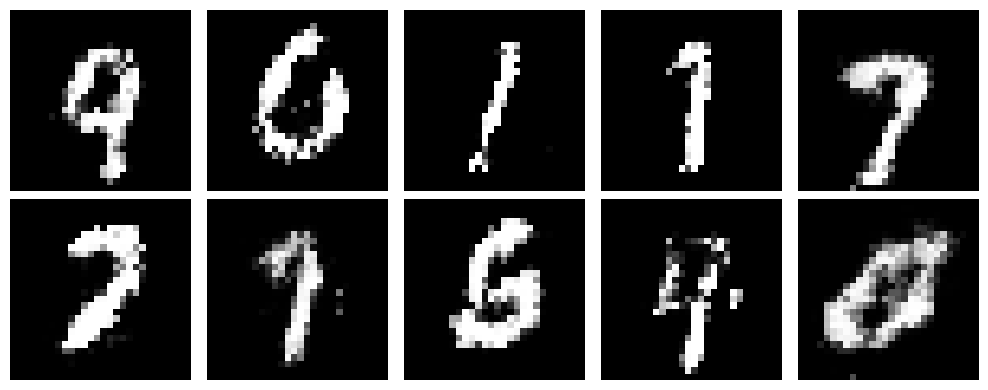

epoch: 5 loss generator: -1.3406 loss discriminator: -1.1076


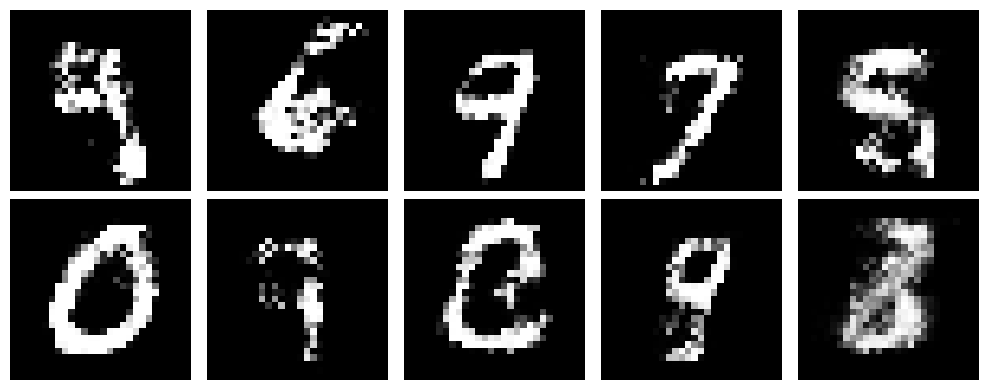

epoch: 6 loss generator: -1.2020 loss discriminator: -1.1708


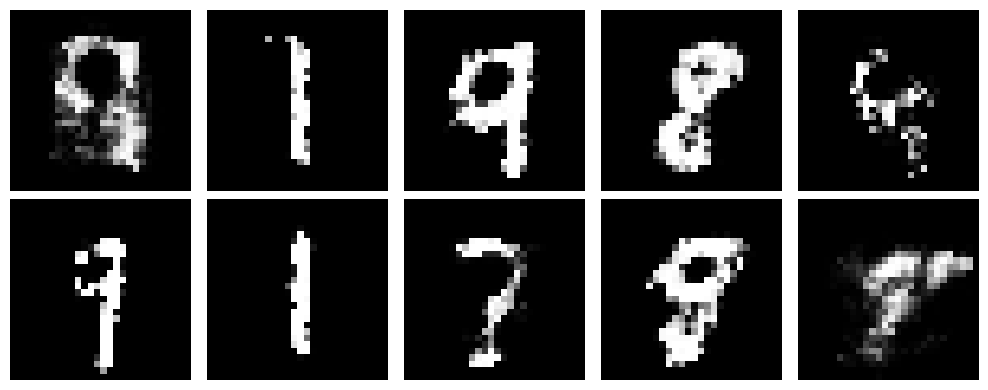

epoch: 7 loss generator: -1.1238 loss discriminator: -1.2044


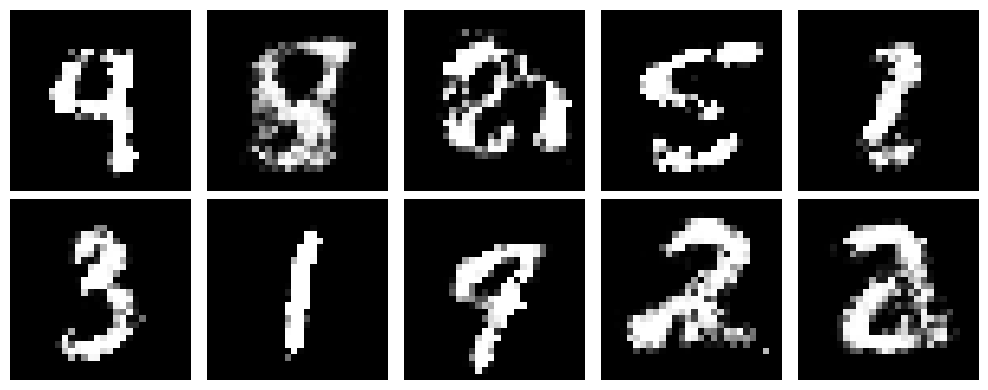

epoch: 8 loss generator: -1.0706 loss discriminator: -1.2281


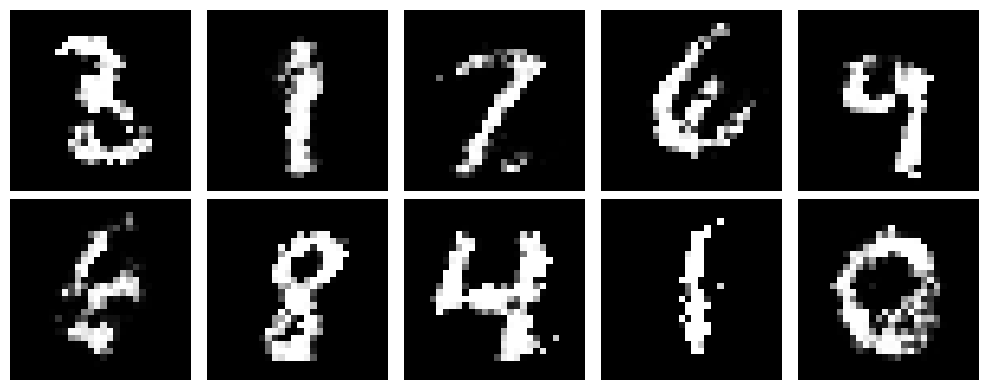

epoch: 9 loss generator: -1.0348 loss discriminator: -1.2421


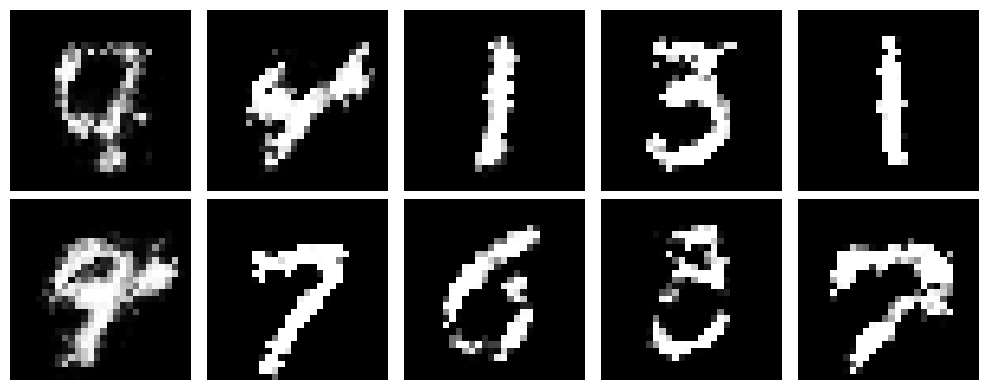

epoch: 10 loss generator: -1.0010 loss discriminator: -1.2558


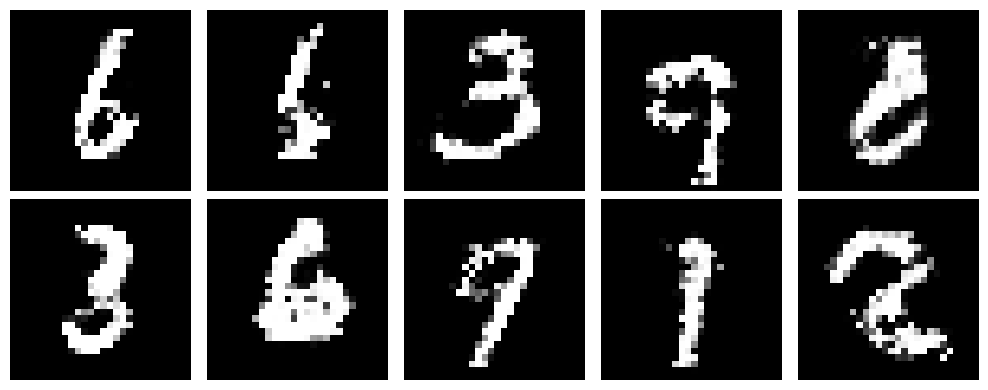

epoch: 11 loss generator: -0.9962 loss discriminator: -1.2574


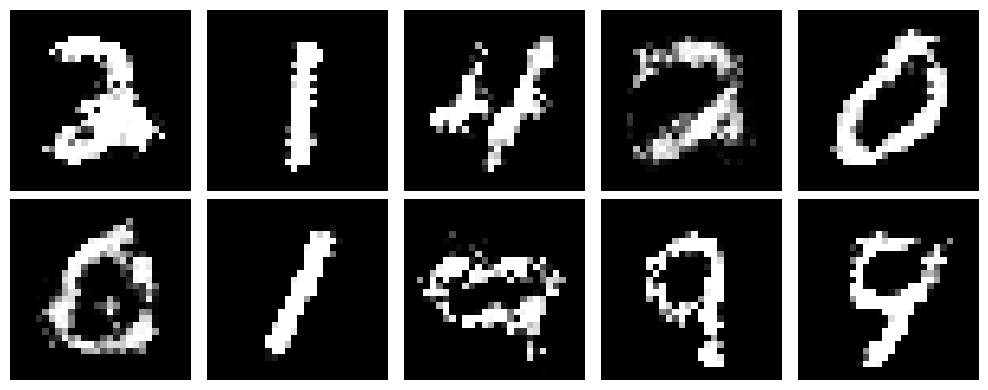

epoch: 12 loss generator: -1.0093 loss discriminator: -1.2469


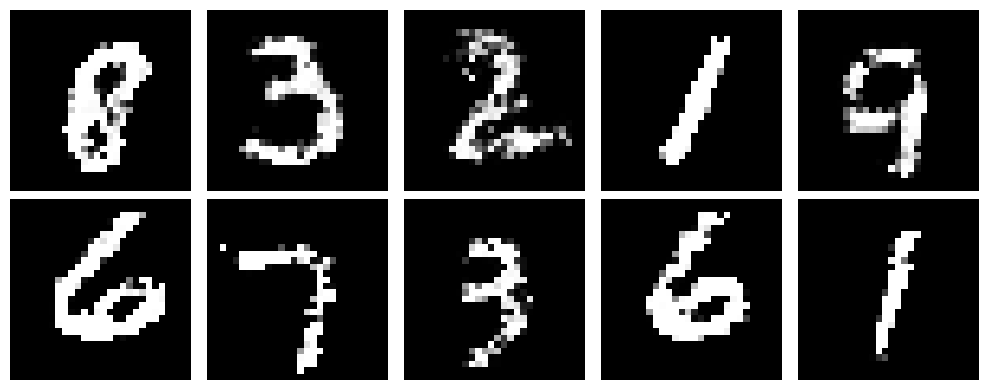

epoch: 13 loss generator: -1.0028 loss discriminator: -1.2501


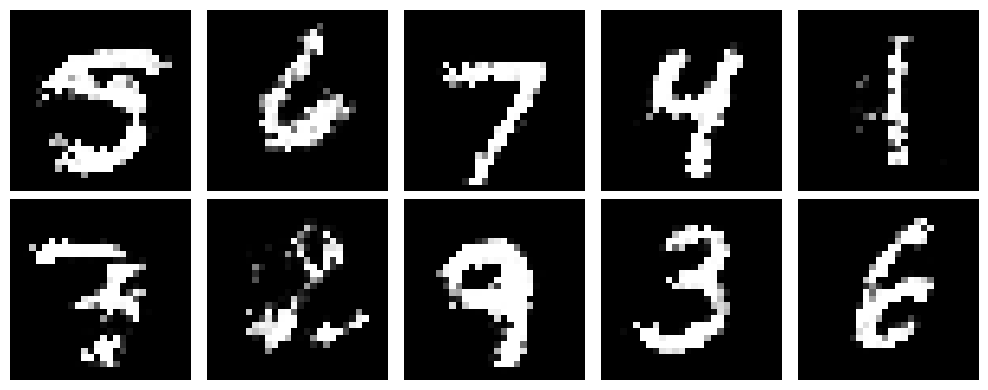

epoch: 14 loss generator: -1.0089 loss discriminator: -1.2475


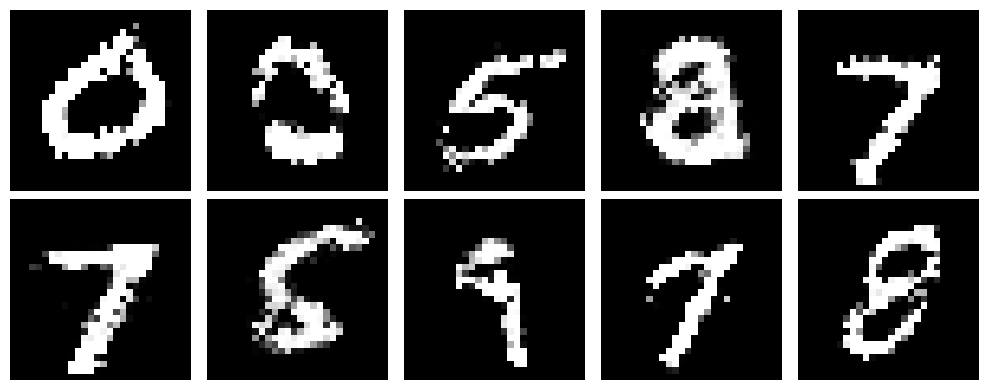

epoch: 15 loss generator: -1.0099 loss discriminator: -1.2449


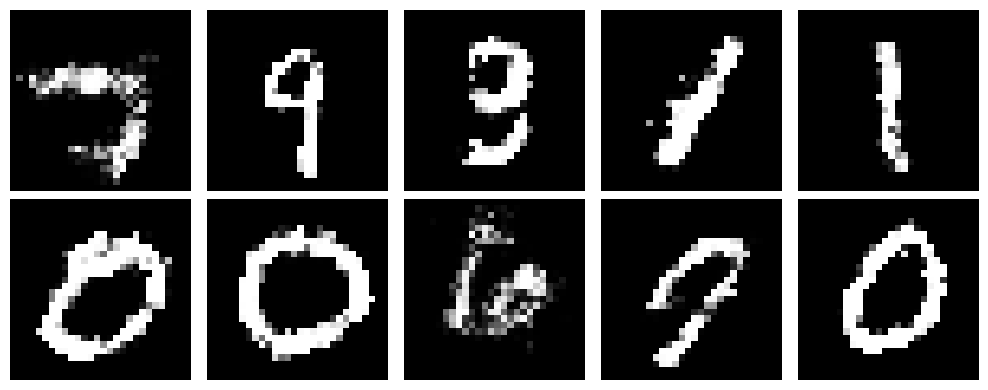

epoch: 16 loss generator: -1.0016 loss discriminator: -1.2494


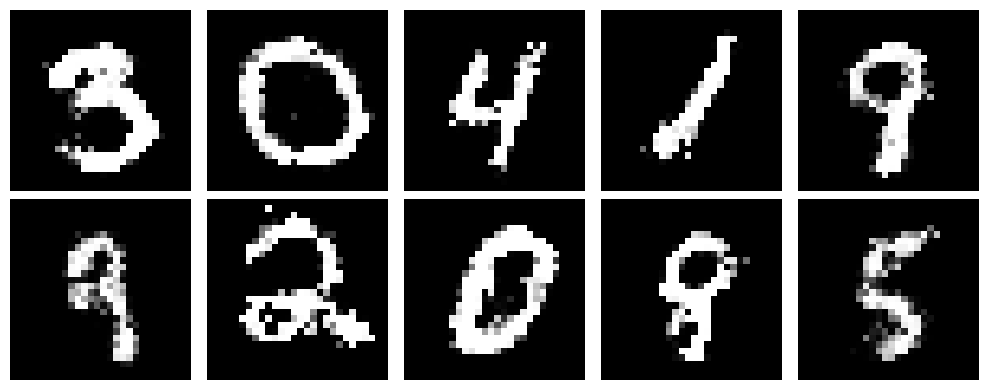

epoch: 17 loss generator: -0.9970 loss discriminator: -1.2520


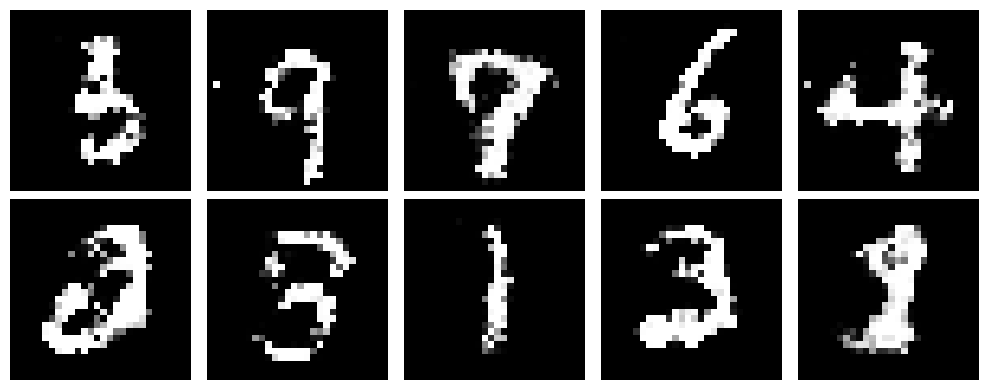

epoch: 18 loss generator: -1.0075 loss discriminator: -1.2456


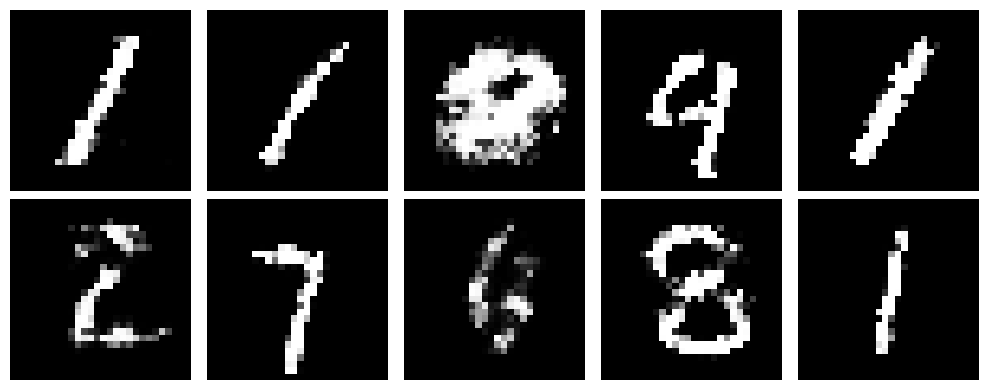

epoch: 19 loss generator: -1.0071 loss discriminator: -1.2488


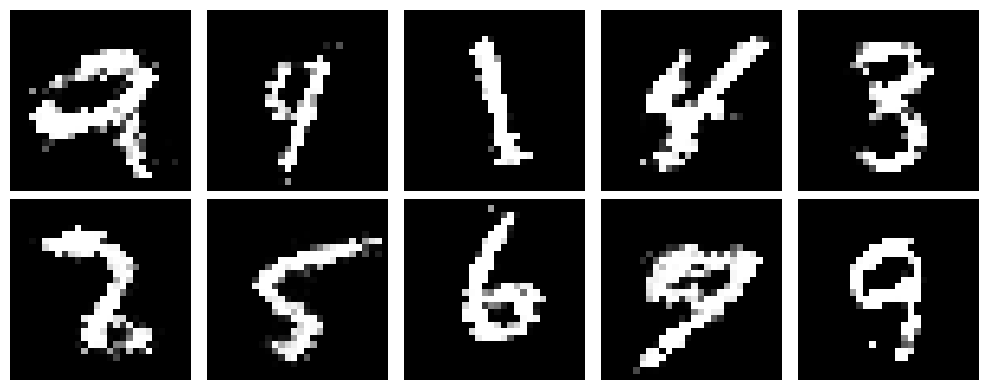

epoch: 20 loss generator: -1.0110 loss discriminator: -1.2446


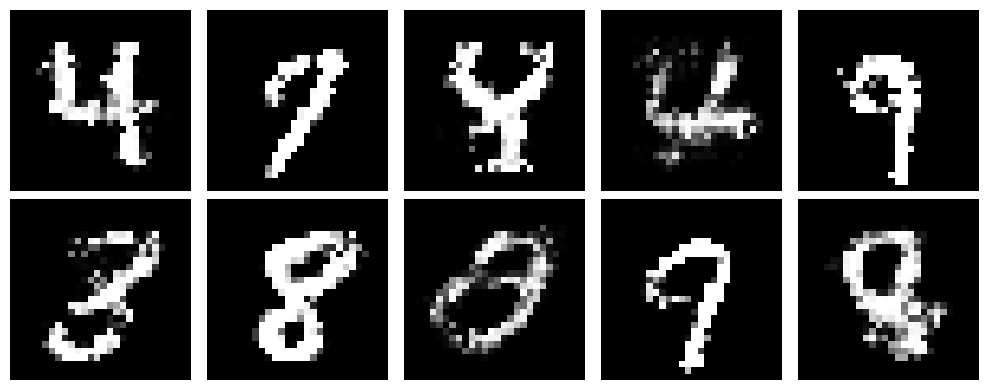

epoch: 21 loss generator: -1.0021 loss discriminator: -1.2462


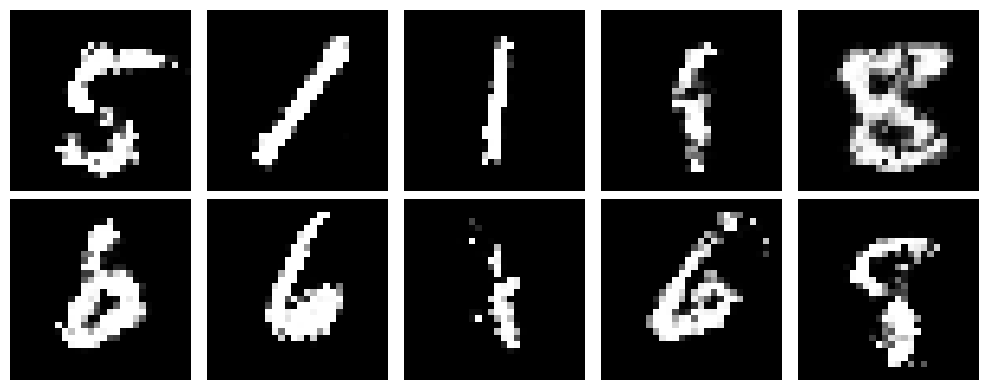

epoch: 22 loss generator: -1.0154 loss discriminator: -1.2419


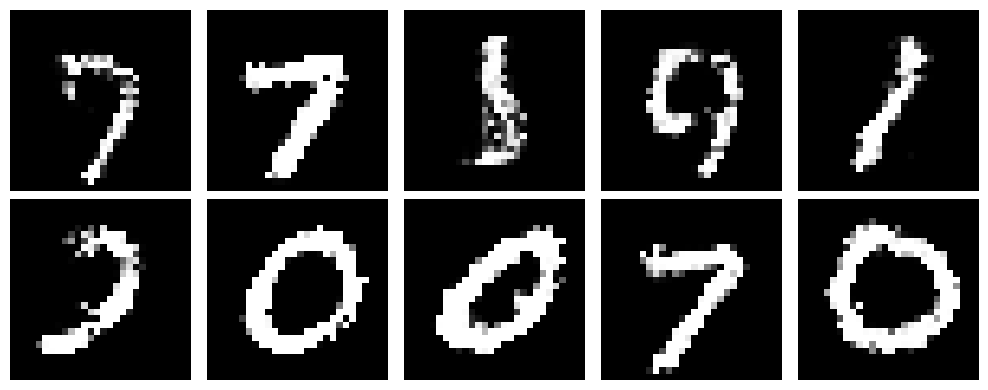

epoch: 23 loss generator: -1.0244 loss discriminator: -1.2397


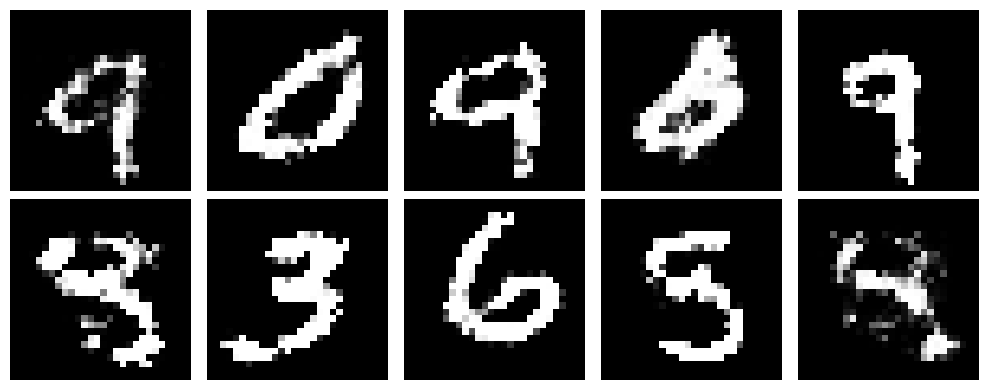

epoch: 24 loss generator: -1.0288 loss discriminator: -1.2389


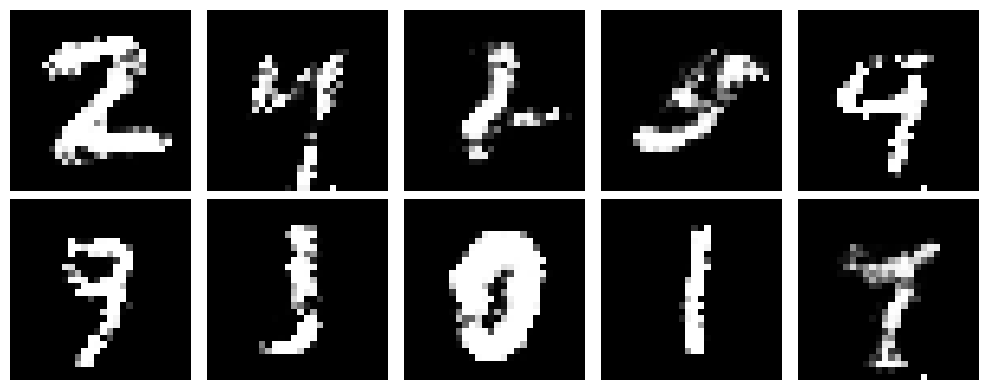

epoch: 25 loss generator: -1.0475 loss discriminator: -1.2347


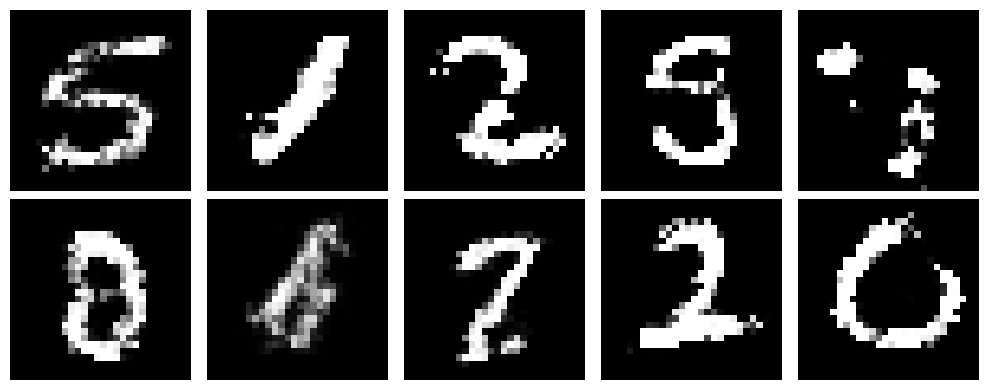

epoch: 26 loss generator: -1.0578 loss discriminator: -1.2233


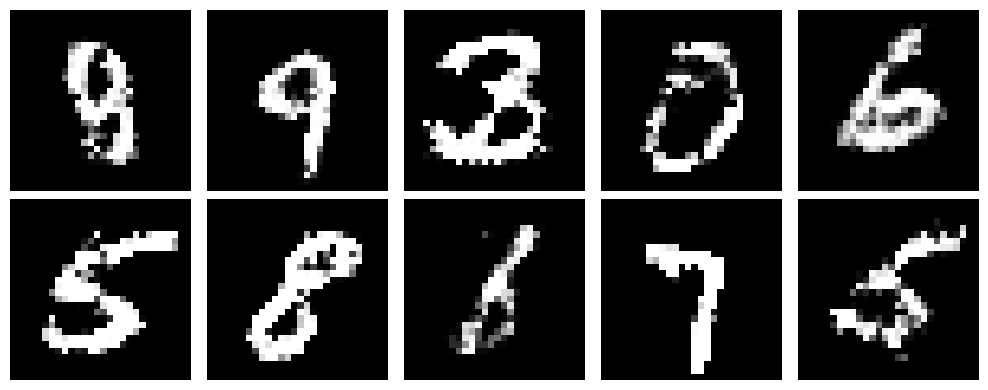

epoch: 27 loss generator: -1.0490 loss discriminator: -1.2277


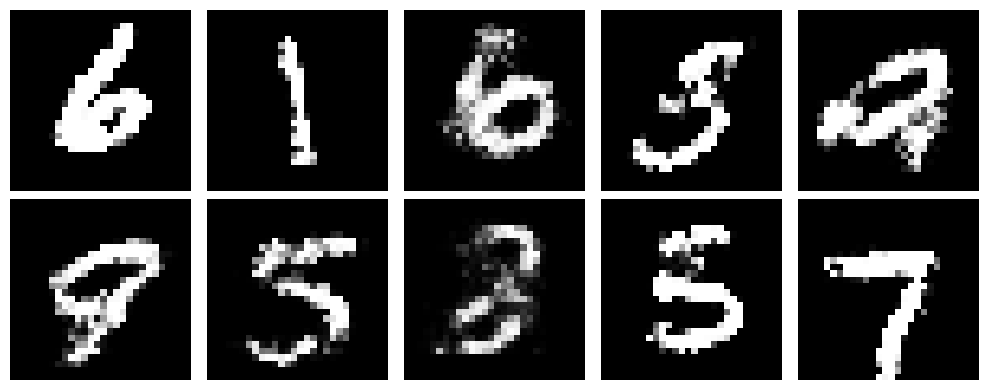

epoch: 28 loss generator: -1.0694 loss discriminator: -1.2189


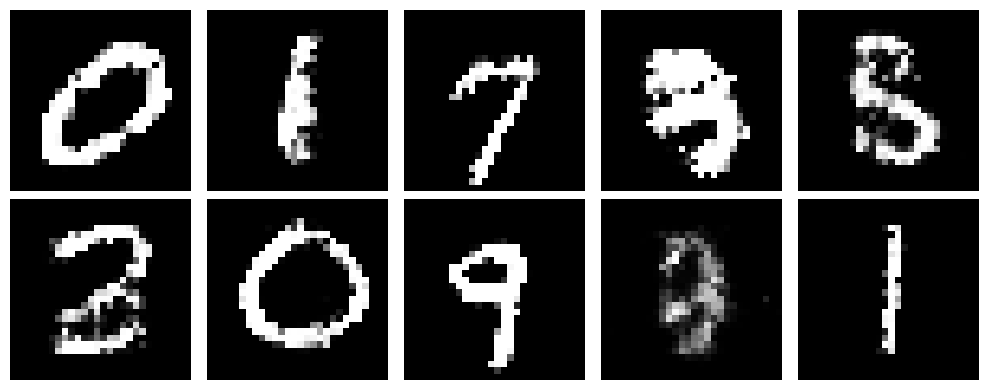

epoch: 29 loss generator: -1.0760 loss discriminator: -1.2186


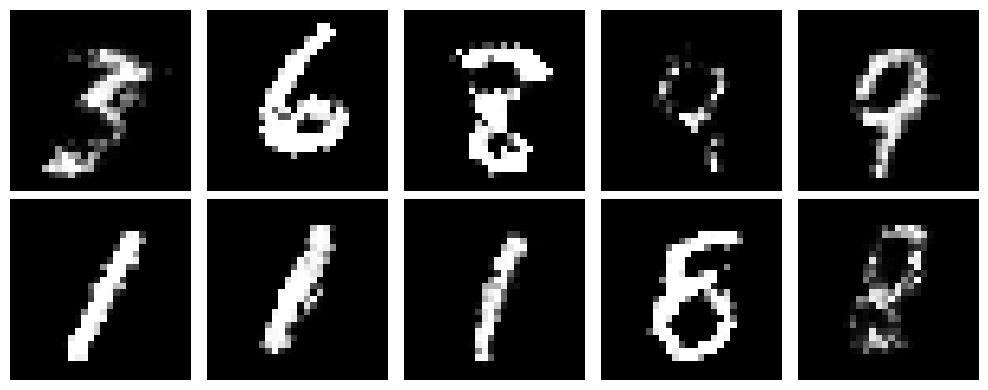

epoch: 30 loss generator: -1.0666 loss discriminator: -1.2208


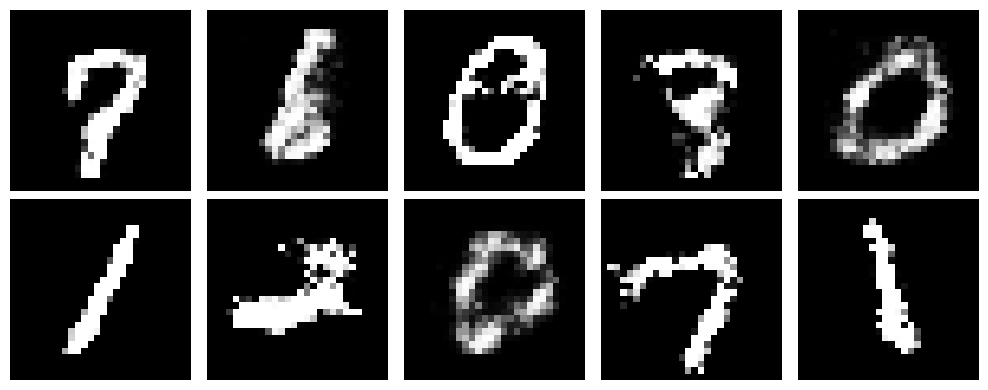

epoch: 31 loss generator: -1.0673 loss discriminator: -1.2235


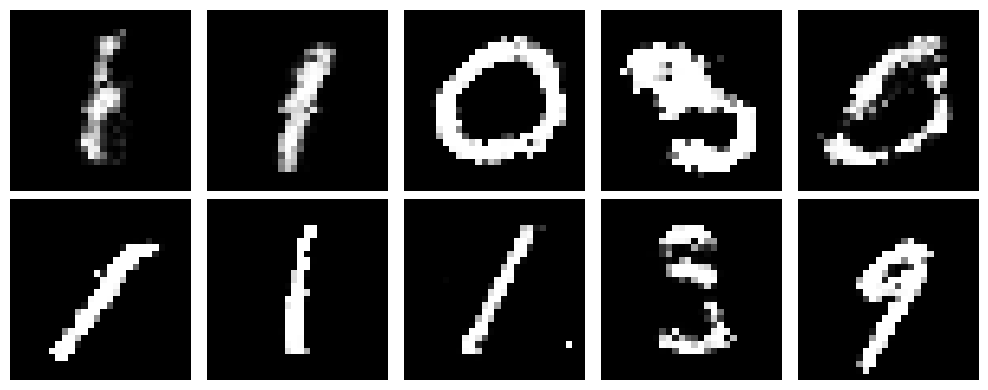

epoch: 32 loss generator: -1.0829 loss discriminator: -1.2175


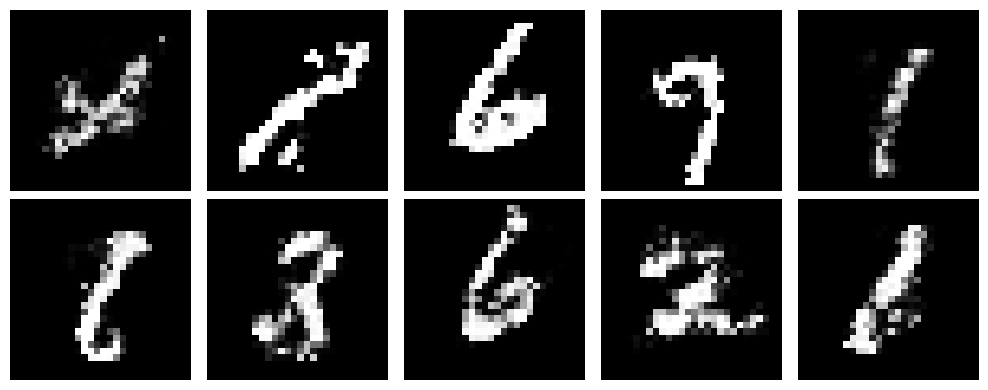

epoch: 33 loss generator: -1.0852 loss discriminator: -1.2140


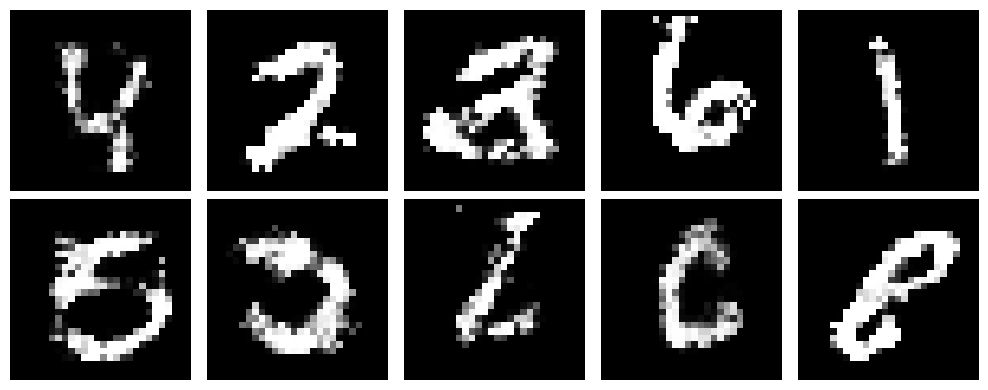

epoch: 34 loss generator: -1.0932 loss discriminator: -1.2105


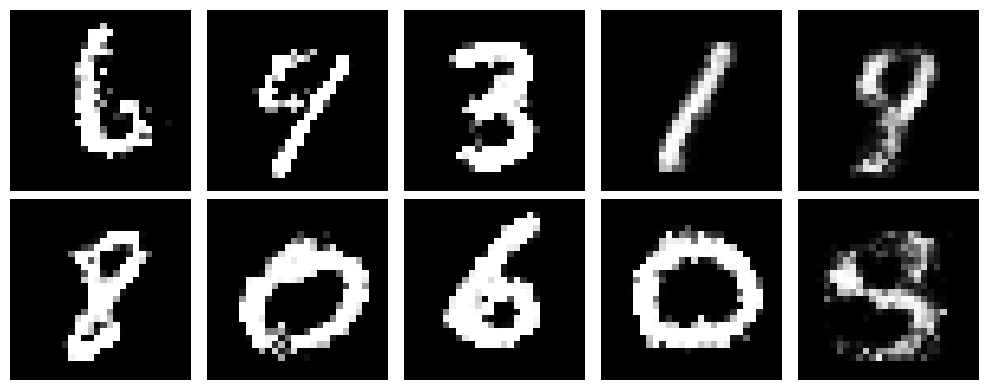

epoch: 35 loss generator: -1.1006 loss discriminator: -1.2058


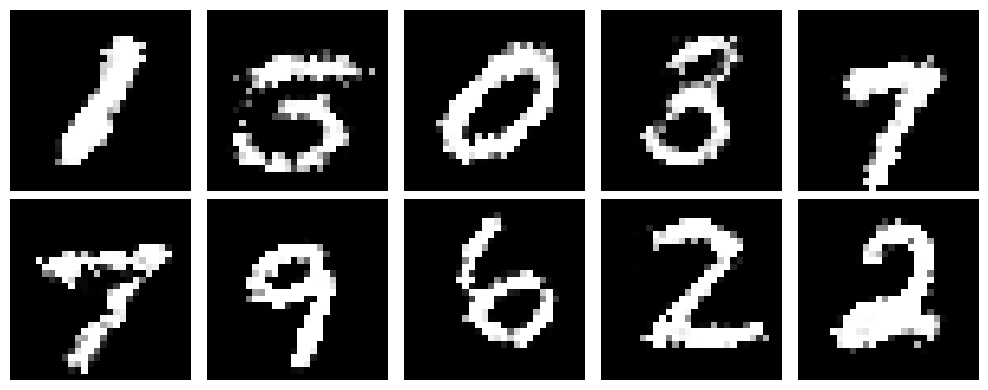

epoch: 36 loss generator: -1.0874 loss discriminator: -1.2136


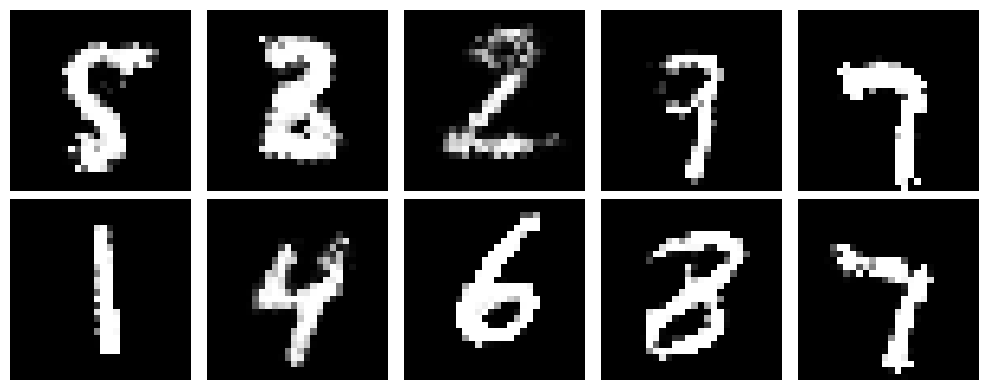

epoch: 37 loss generator: -1.1011 loss discriminator: -1.2033


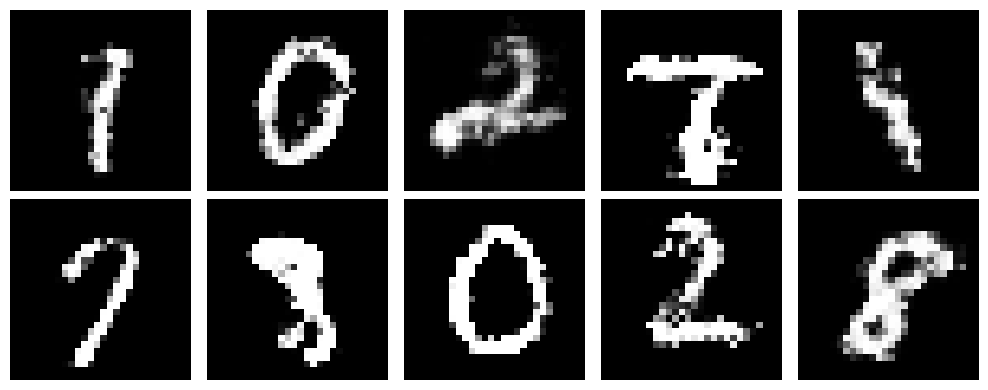

epoch: 38 loss generator: -1.1055 loss discriminator: -1.2051


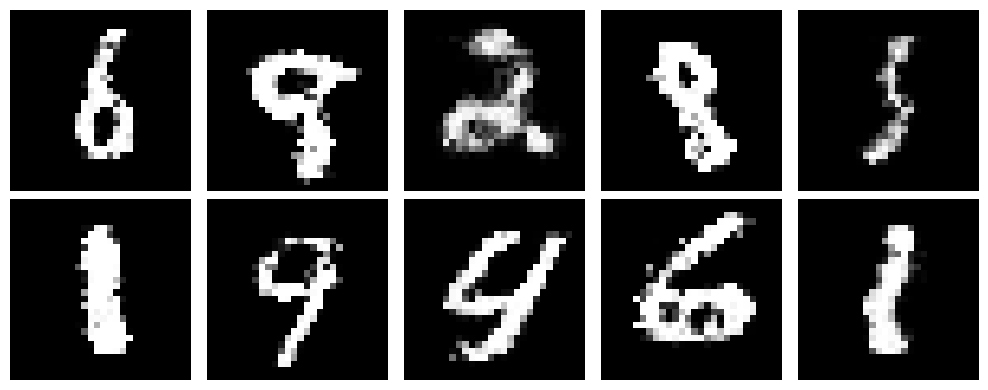

epoch: 39 loss generator: -1.1025 loss discriminator: -1.2028


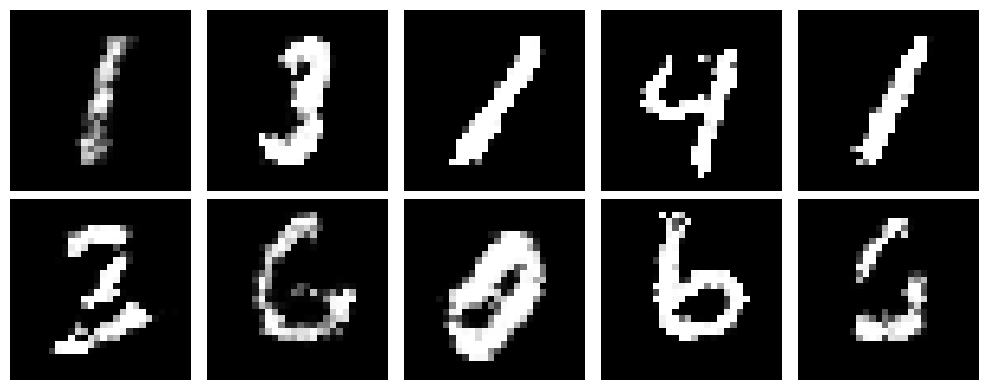

epoch: 40 loss generator: -1.1060 loss discriminator: -1.2087


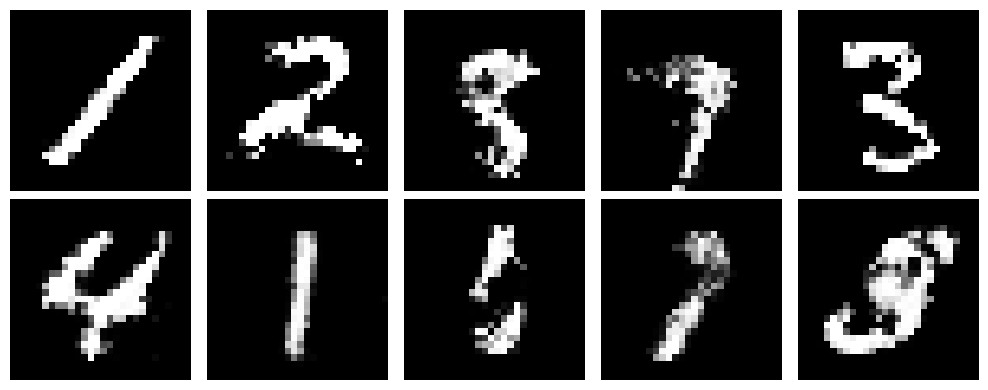

epoch: 41 loss generator: -1.0932 loss discriminator: -1.2073


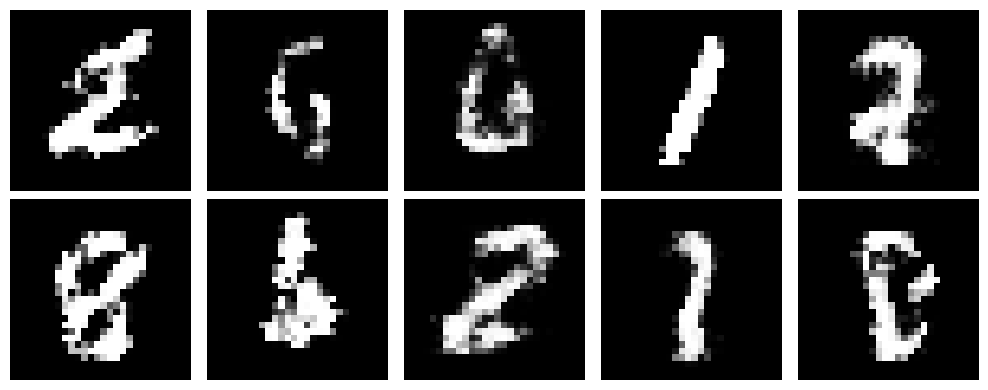

epoch: 42 loss generator: -1.0999 loss discriminator: -1.2023


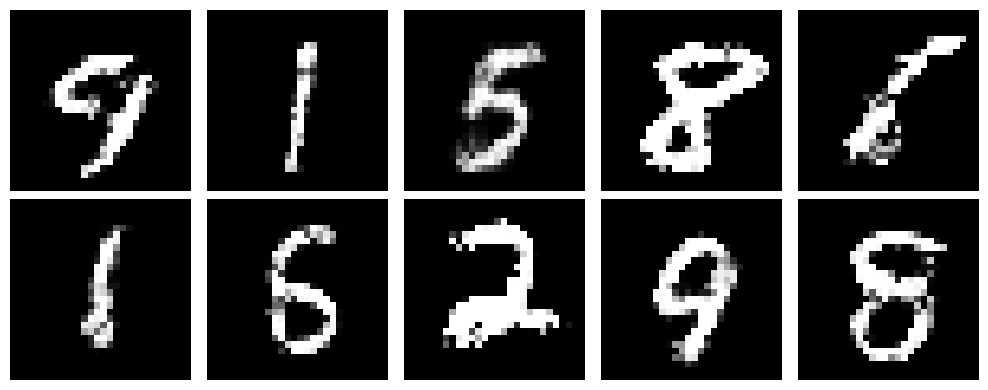

epoch: 43 loss generator: -1.1000 loss discriminator: -1.2049


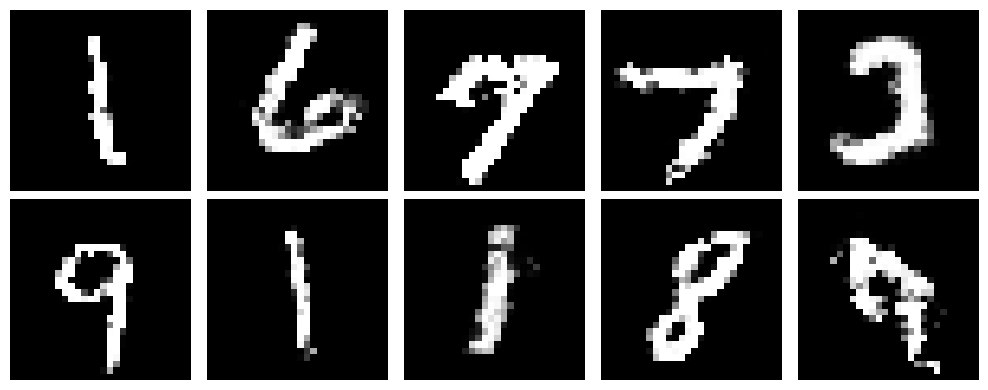

epoch: 44 loss generator: -1.1061 loss discriminator: -1.2051


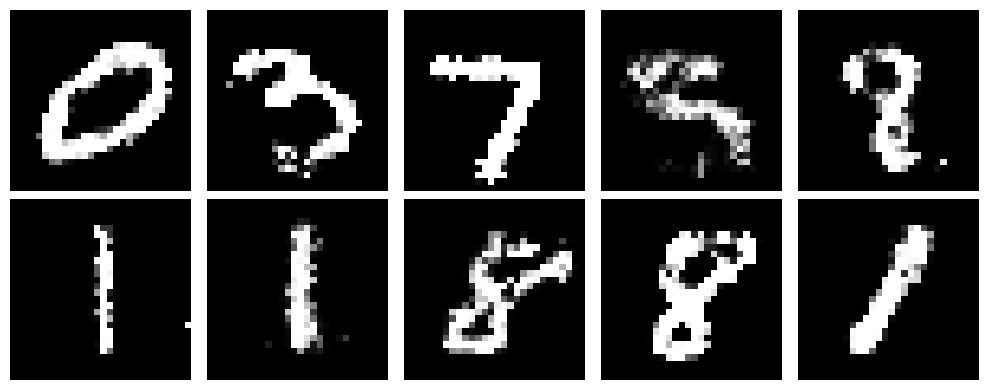

epoch: 45 loss generator: -1.1149 loss discriminator: -1.2018


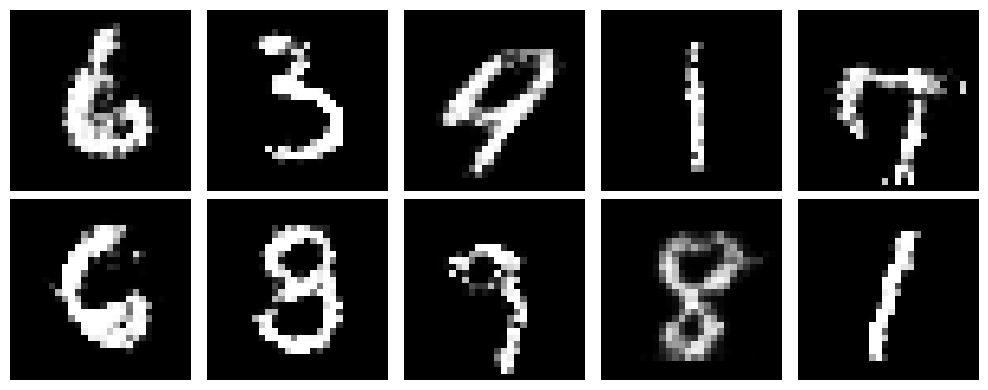

epoch: 46 loss generator: -1.1018 loss discriminator: -1.2109


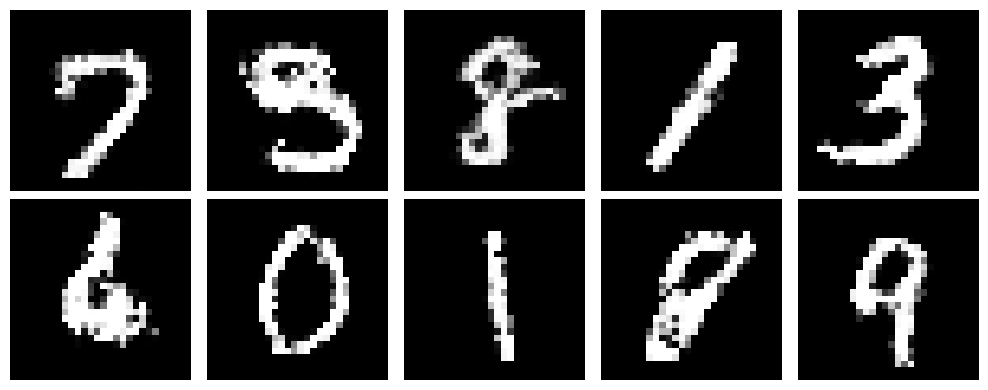

epoch: 47 loss generator: -1.1126 loss discriminator: -1.2026


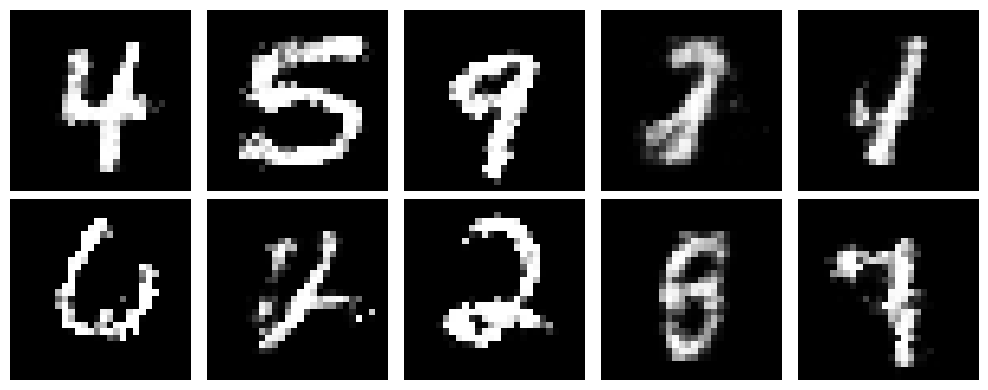

epoch: 48 loss generator: -1.1313 loss discriminator: -1.1916


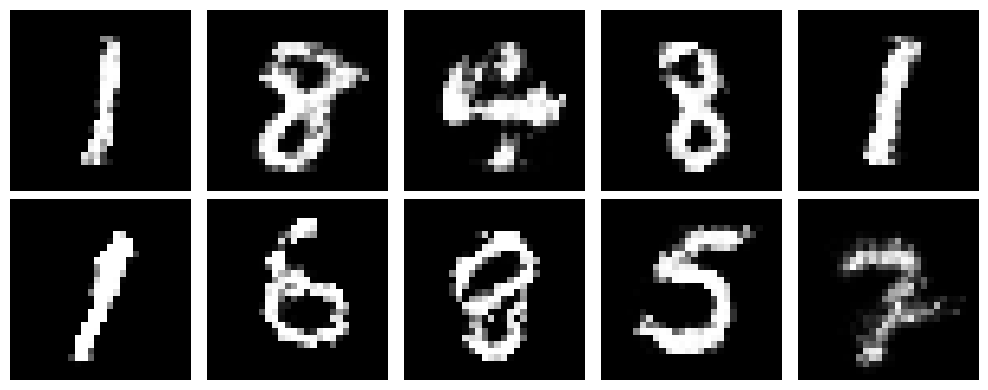

epoch: 49 loss generator: -1.1255 loss discriminator: -1.2004


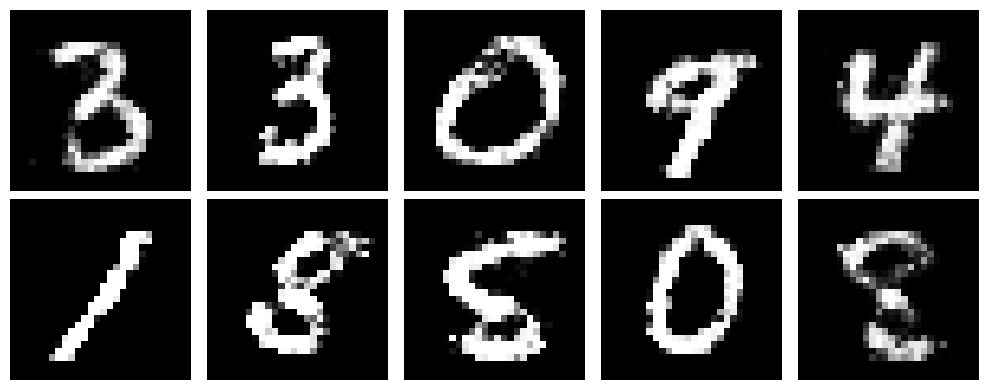

epoch: 50 loss generator: -1.1191 loss discriminator: -1.1993


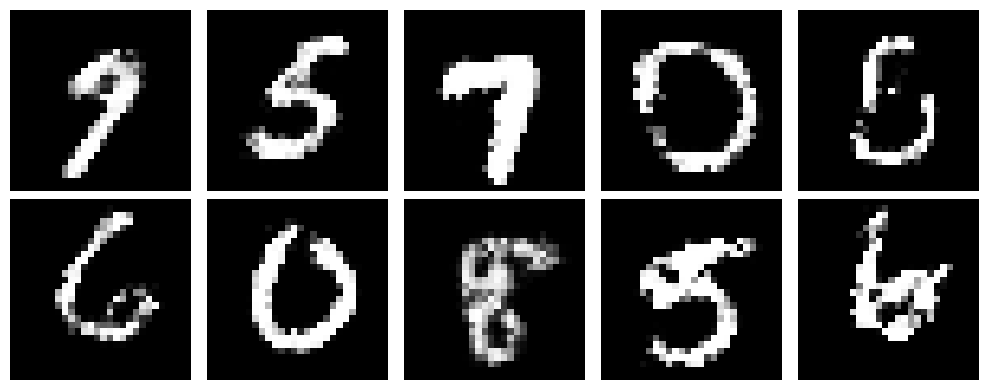

epoch: 51 loss generator: -1.1427 loss discriminator: -1.1853


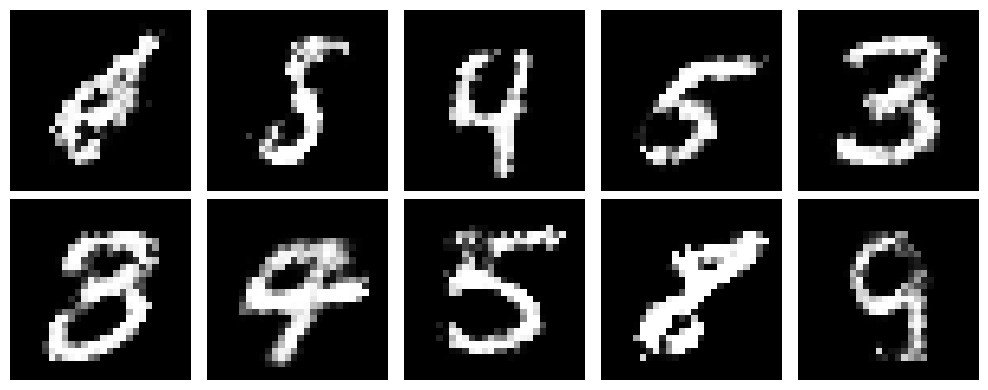

epoch: 52 loss generator: -1.1336 loss discriminator: -1.1905


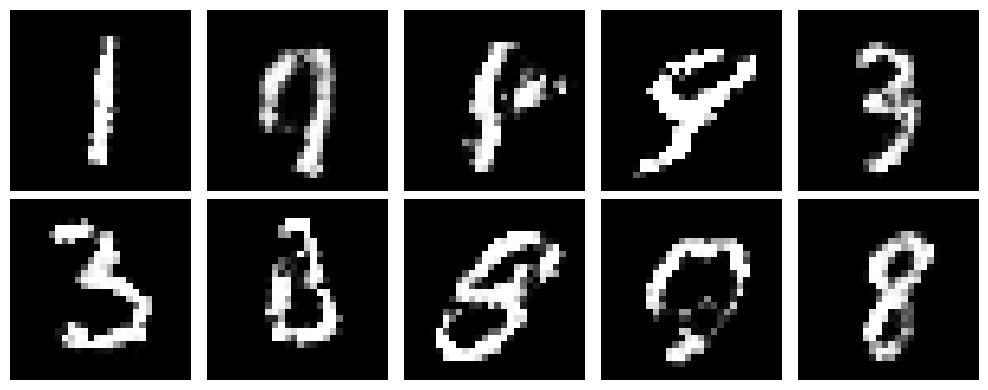

epoch: 53 loss generator: -1.1429 loss discriminator: -1.1885


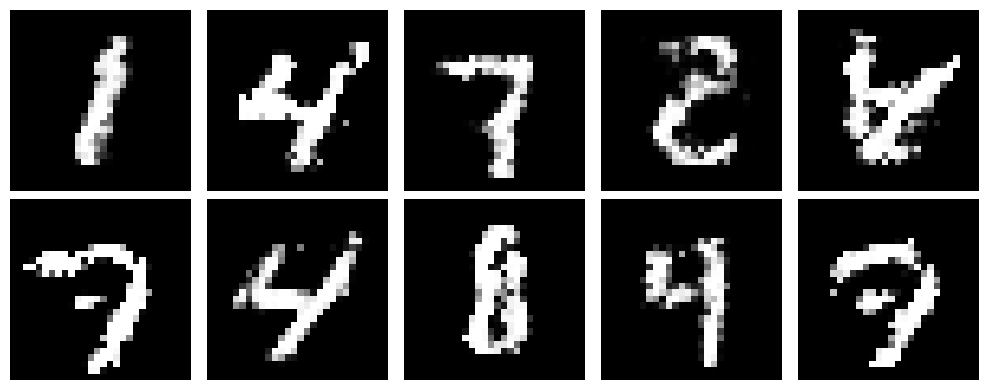

epoch: 54 loss generator: -1.1396 loss discriminator: -1.1875


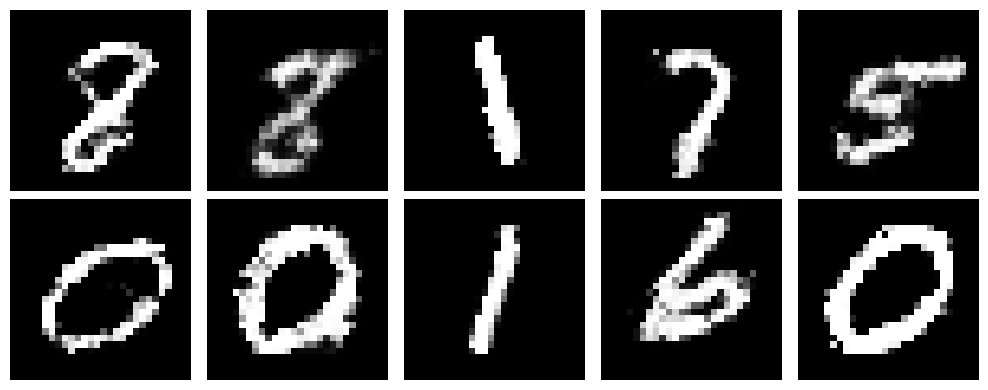

epoch: 55 loss generator: -1.1323 loss discriminator: -1.1938


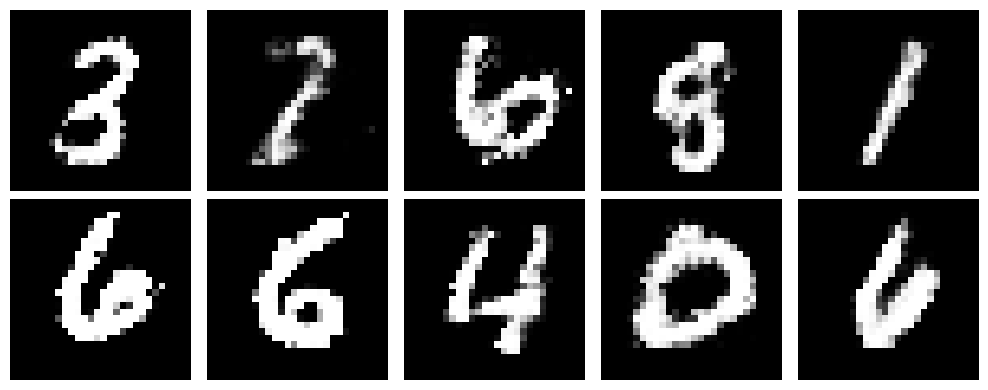

epoch: 56 loss generator: -1.1359 loss discriminator: -1.1899


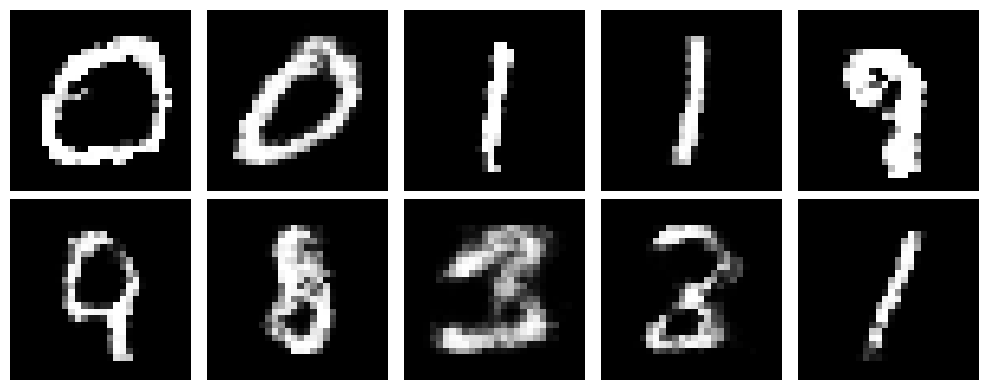

epoch: 57 loss generator: -1.1265 loss discriminator: -1.1954


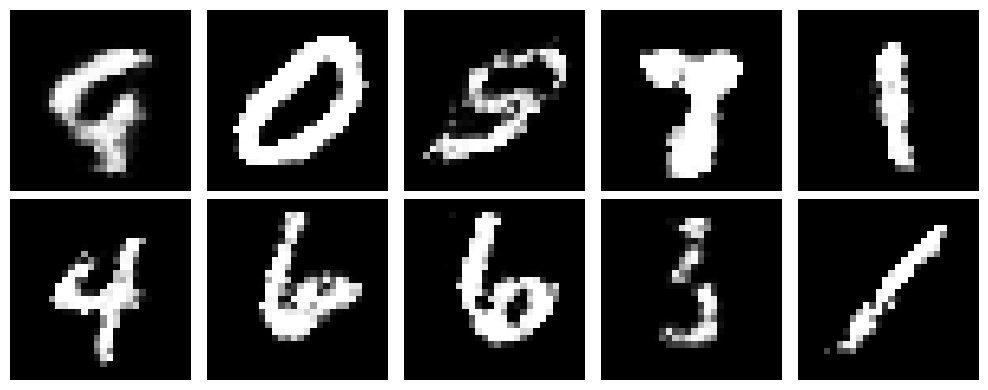

epoch: 58 loss generator: -1.1348 loss discriminator: -1.1924


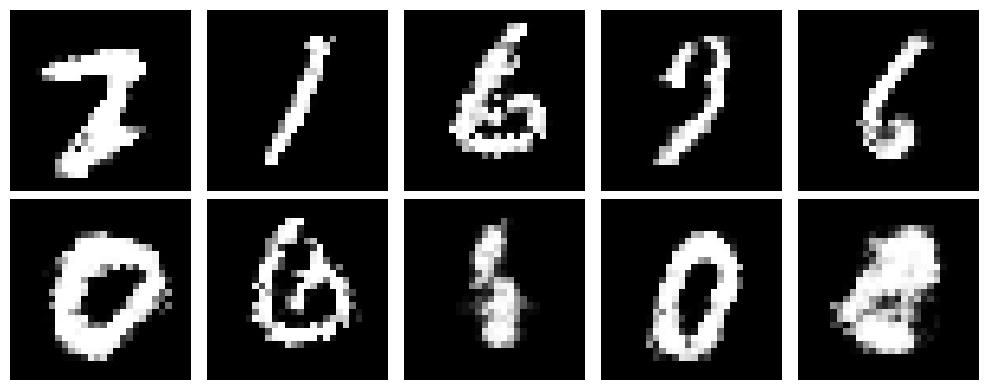

epoch: 59 loss generator: -1.1415 loss discriminator: -1.1901


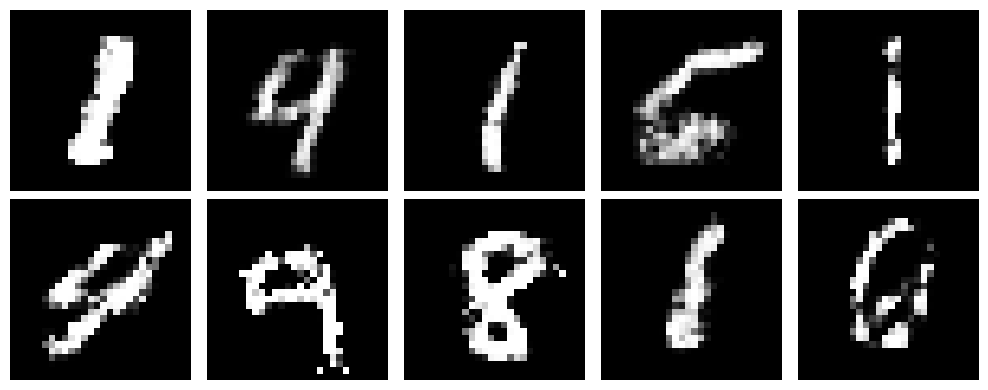

epoch: 60 loss generator: -1.1423 loss discriminator: -1.1876


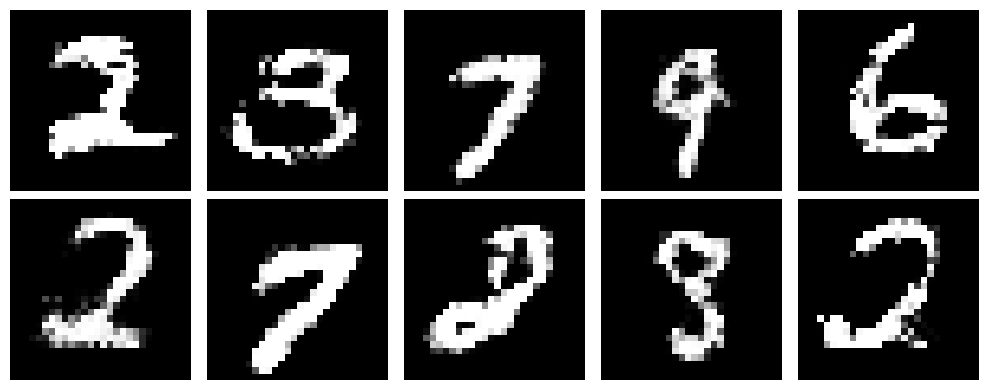

epoch: 61 loss generator: -1.1475 loss discriminator: -1.1873


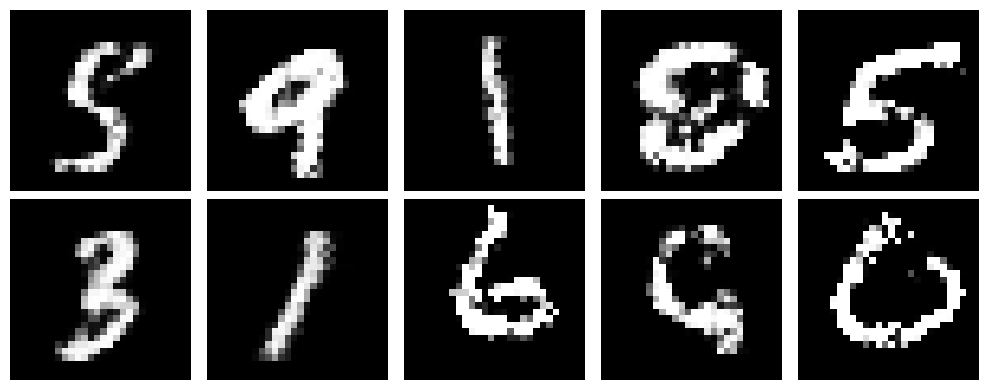

epoch: 62 loss generator: -1.1306 loss discriminator: -1.1913


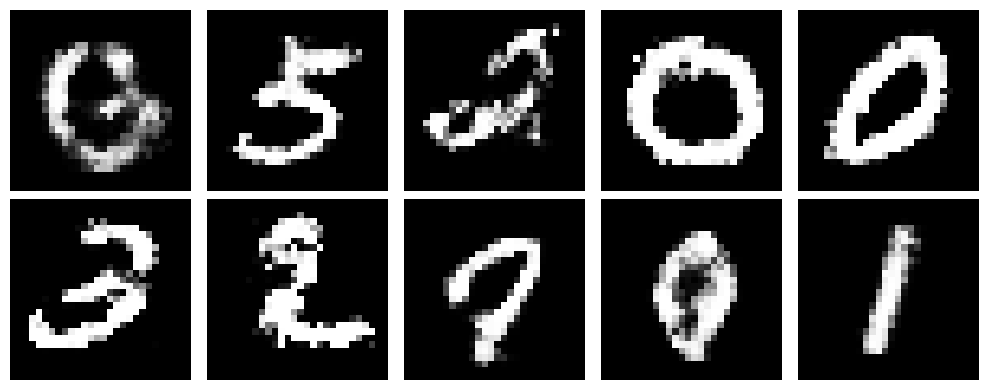

epoch: 63 loss generator: -1.1370 loss discriminator: -1.1896


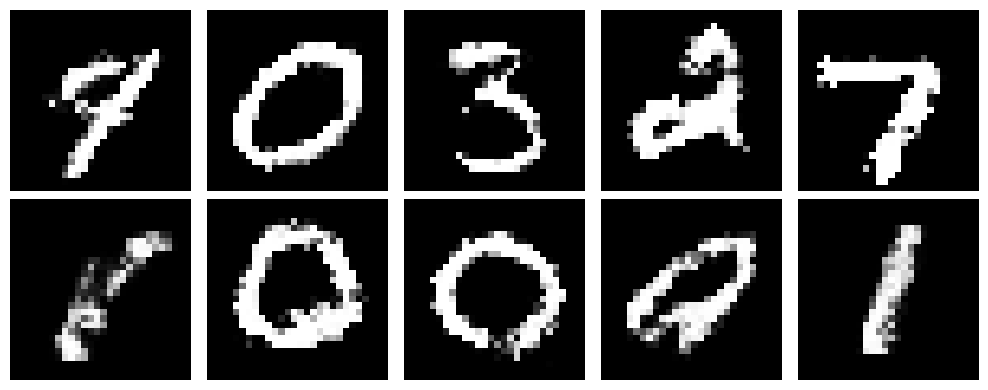

epoch: 64 loss generator: -1.1467 loss discriminator: -1.1905


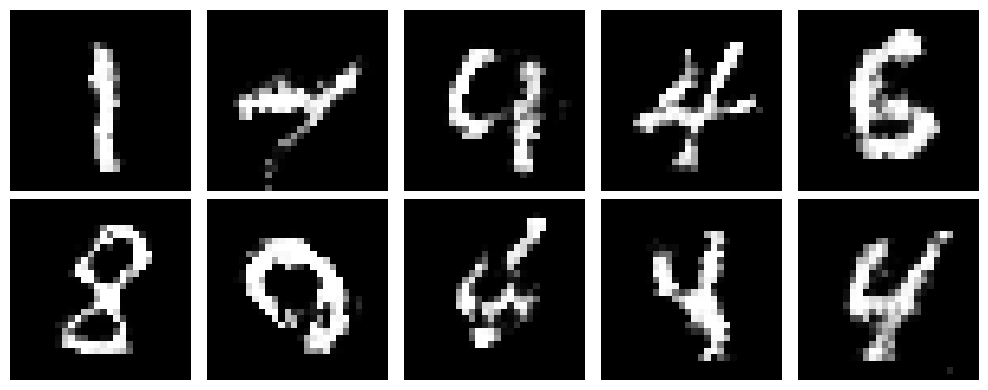

epoch: 65 loss generator: -1.1298 loss discriminator: -1.1919


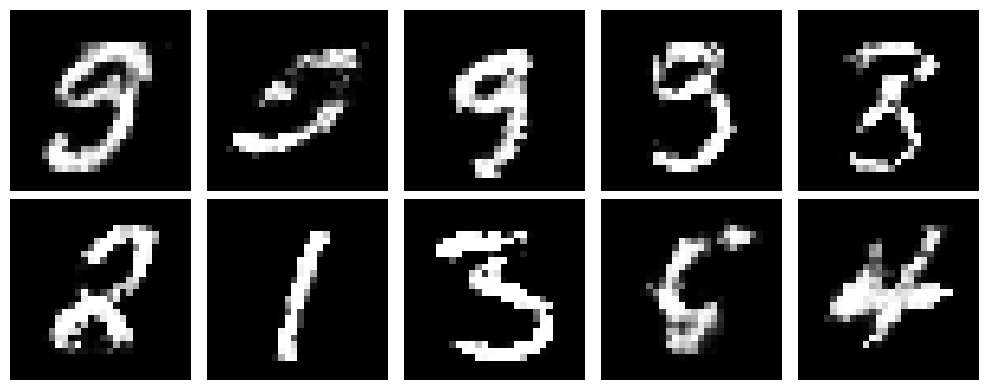

epoch: 66 loss generator: -1.1537 loss discriminator: -1.1835


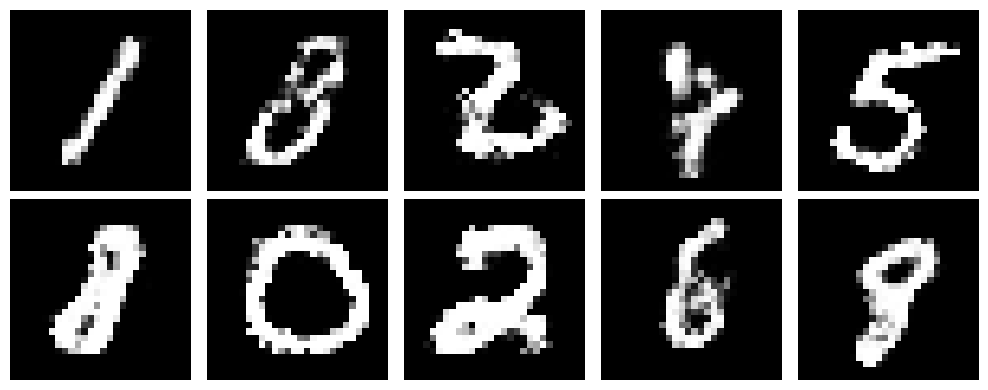

epoch: 67 loss generator: -1.1342 loss discriminator: -1.1922


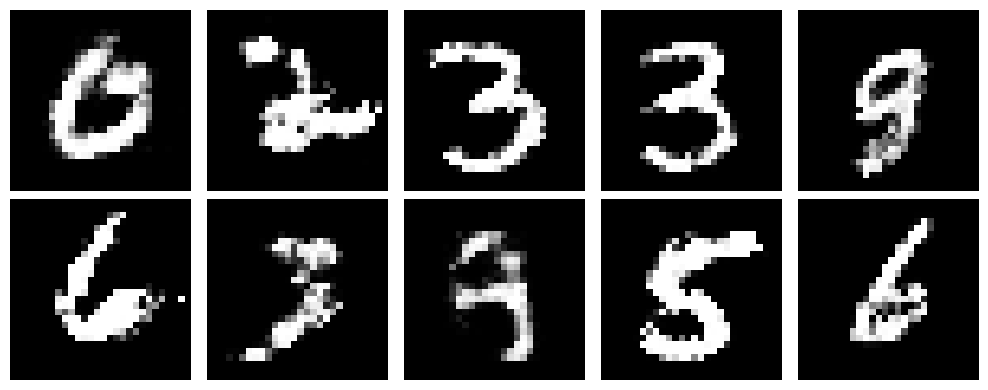

epoch: 68 loss generator: -1.1460 loss discriminator: -1.1860


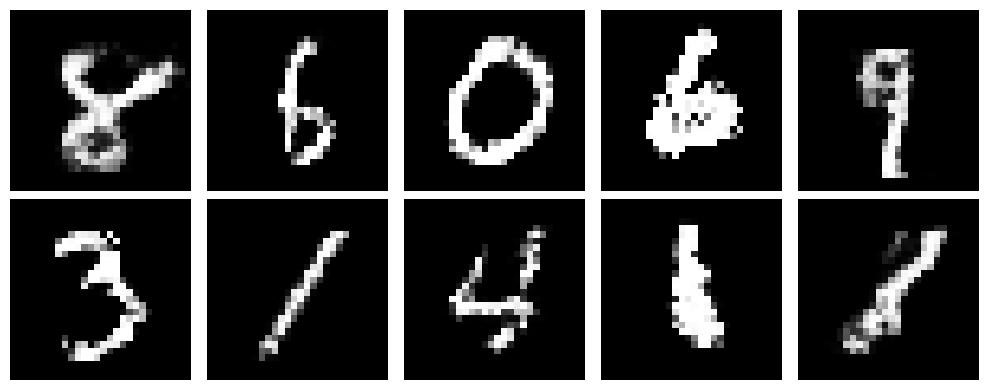

epoch: 69 loss generator: -1.1563 loss discriminator: -1.1805


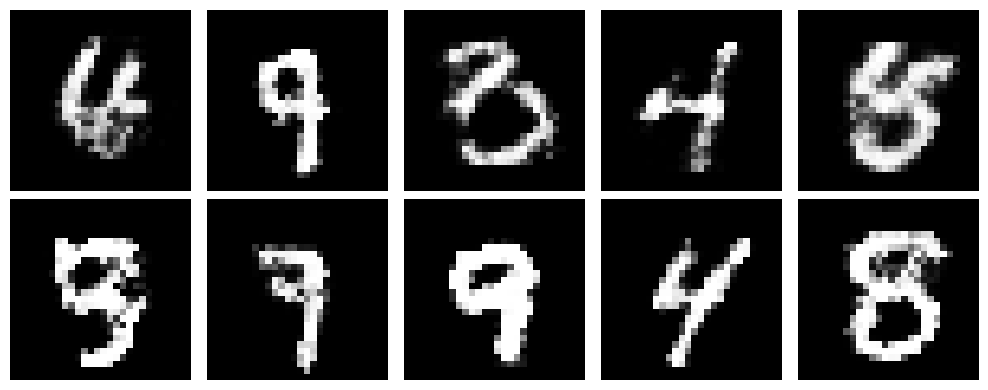

epoch: 70 loss generator: -1.1428 loss discriminator: -1.1898


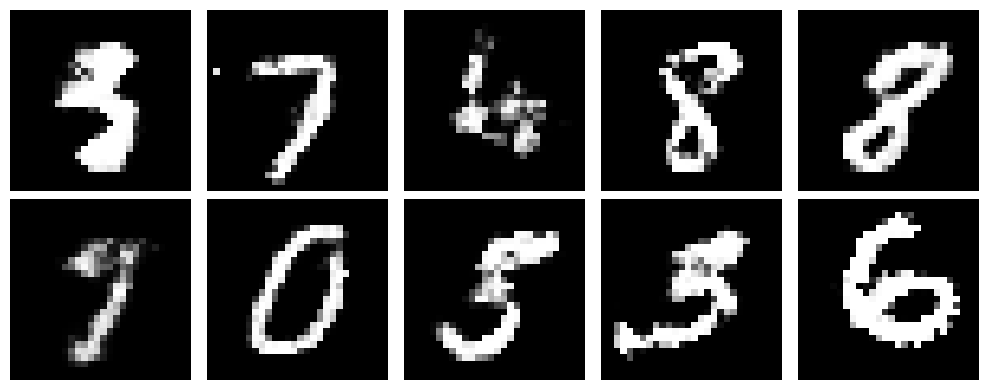

epoch: 71 loss generator: -1.1331 loss discriminator: -1.1938


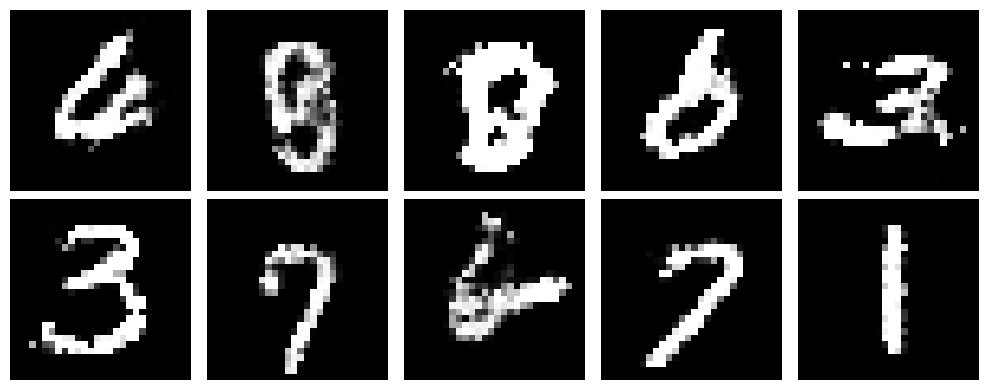

epoch: 72 loss generator: -1.1521 loss discriminator: -1.1856


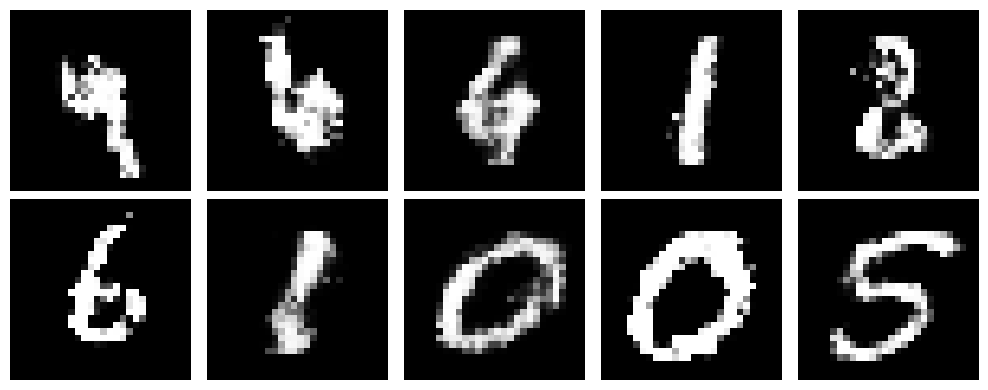

epoch: 73 loss generator: -1.1382 loss discriminator: -1.1902


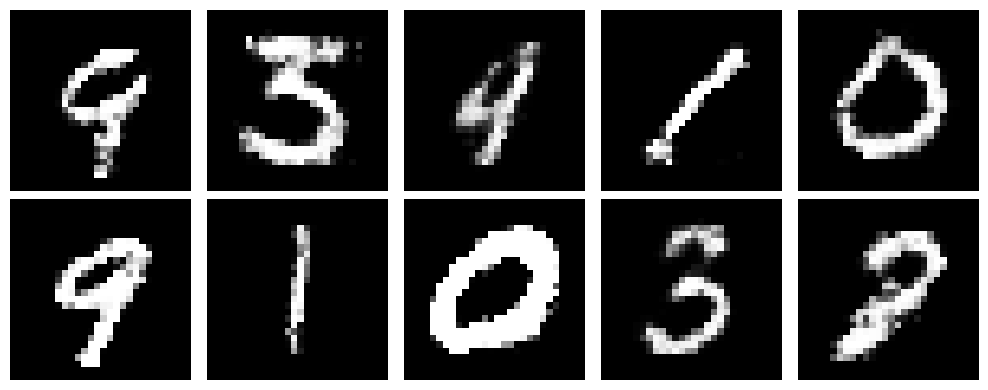

epoch: 74 loss generator: -1.1536 loss discriminator: -1.1851


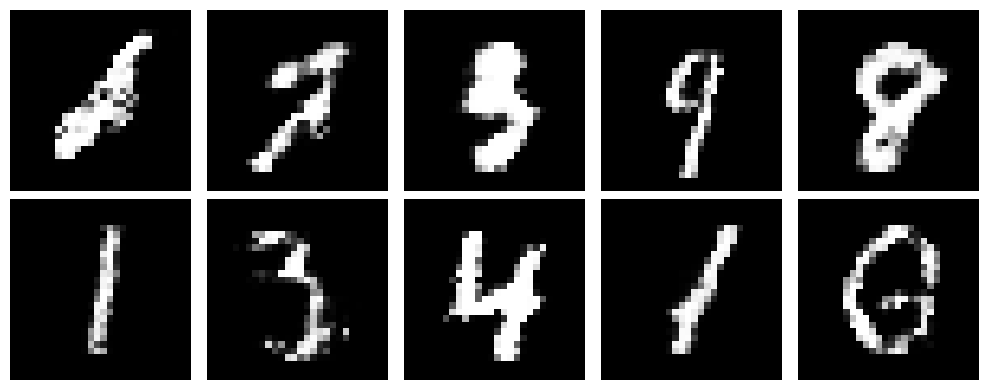

epoch: 75 loss generator: -1.1486 loss discriminator: -1.1824


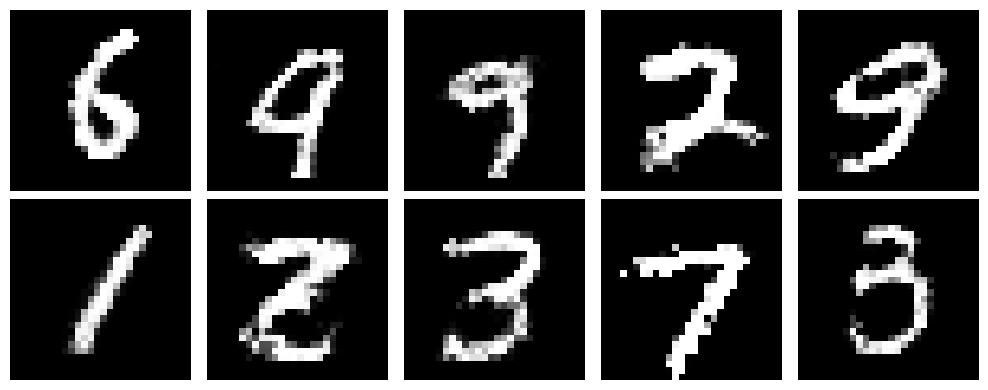

epoch: 76 loss generator: -1.1256 loss discriminator: -1.2004


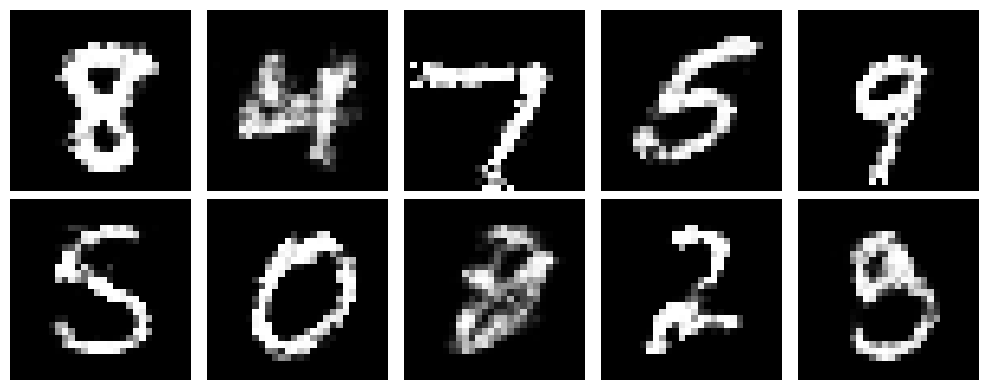

epoch: 77 loss generator: -1.1405 loss discriminator: -1.1924


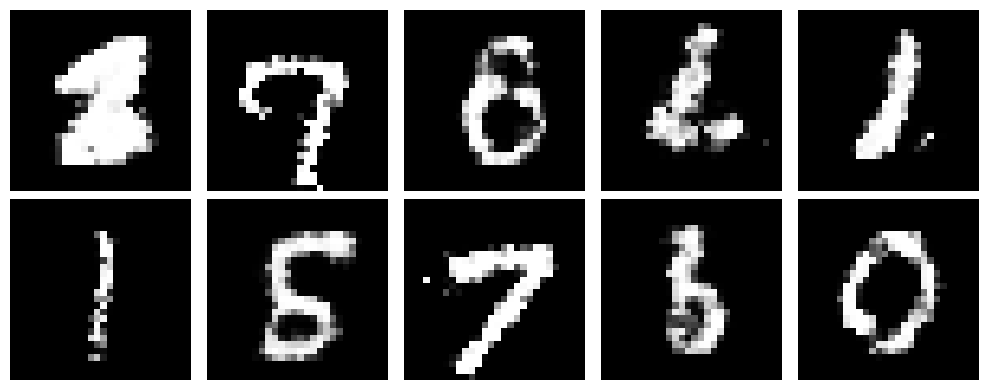

epoch: 78 loss generator: -1.1516 loss discriminator: -1.1839


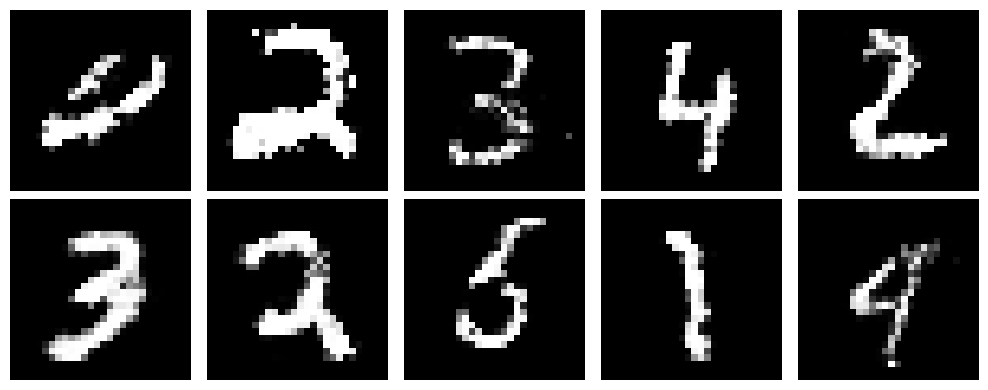

epoch: 79 loss generator: -1.1557 loss discriminator: -1.1815


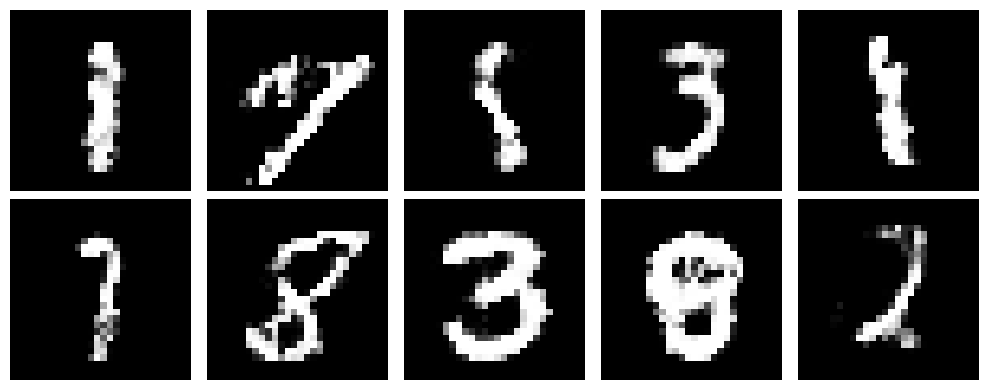

epoch: 80 loss generator: -1.1617 loss discriminator: -1.1786


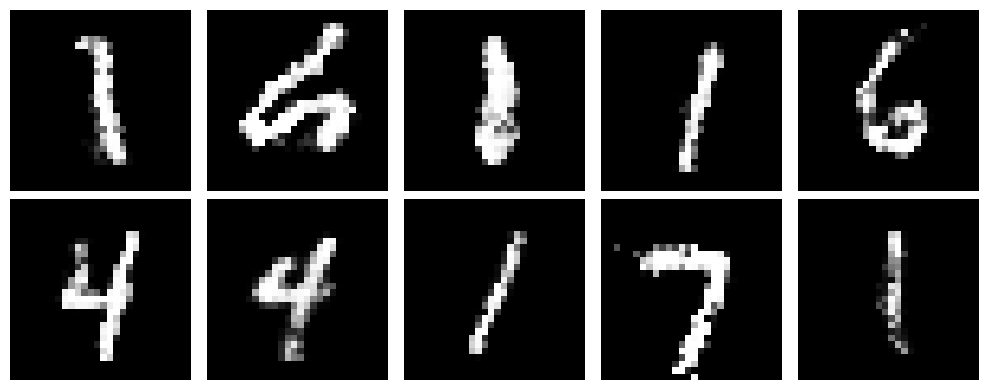

epoch: 81 loss generator: -1.1447 loss discriminator: -1.1899


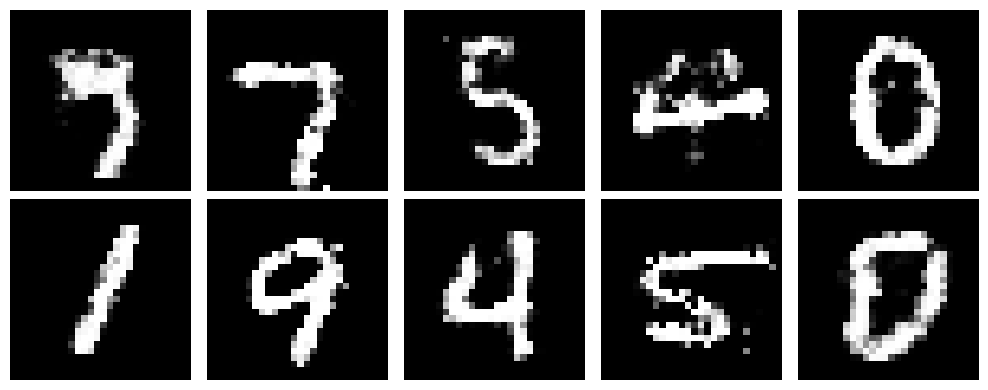

epoch: 82 loss generator: -1.1581 loss discriminator: -1.1765


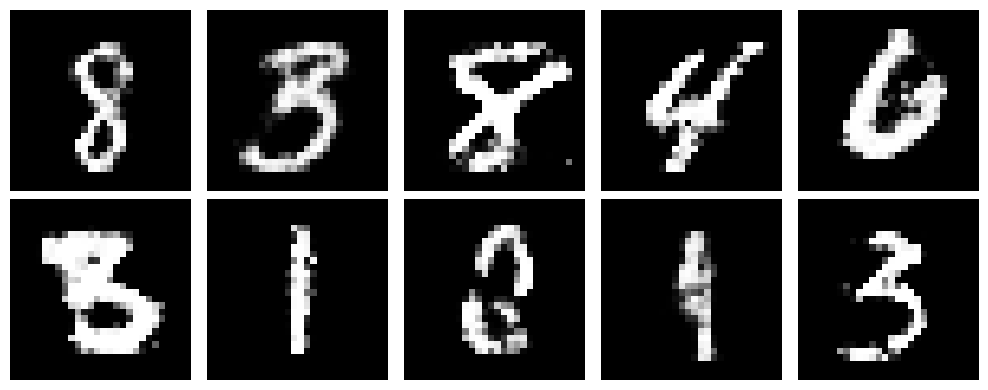

epoch: 83 loss generator: -1.1465 loss discriminator: -1.1867


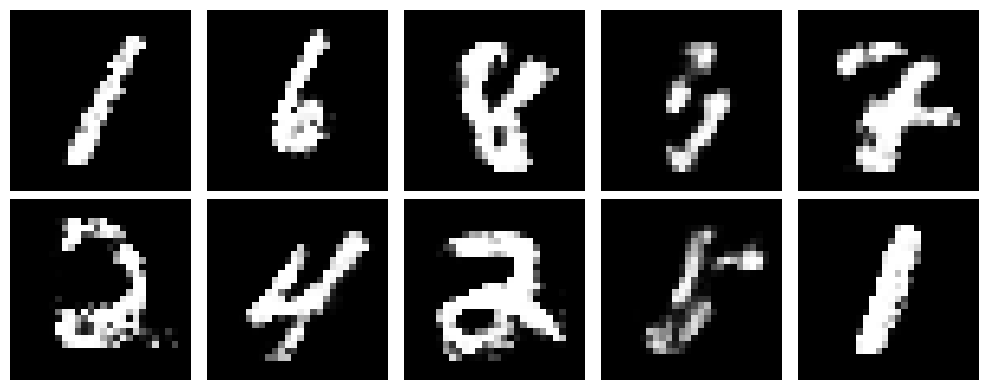

epoch: 84 loss generator: -1.1583 loss discriminator: -1.1823


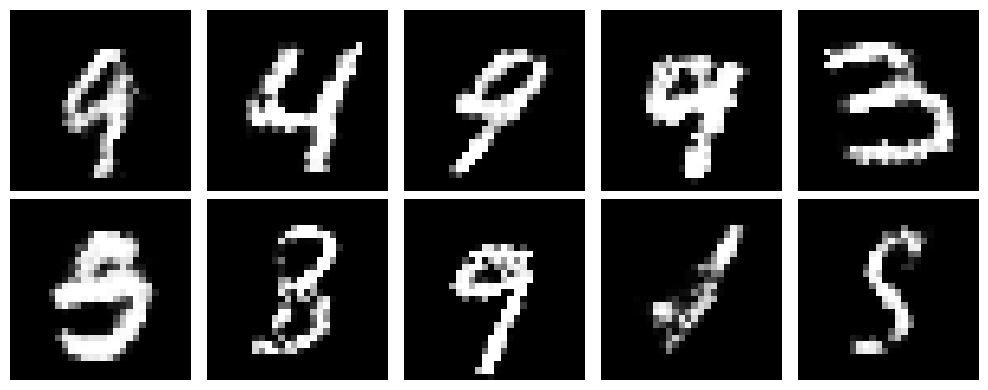

epoch: 85 loss generator: -1.1588 loss discriminator: -1.1843


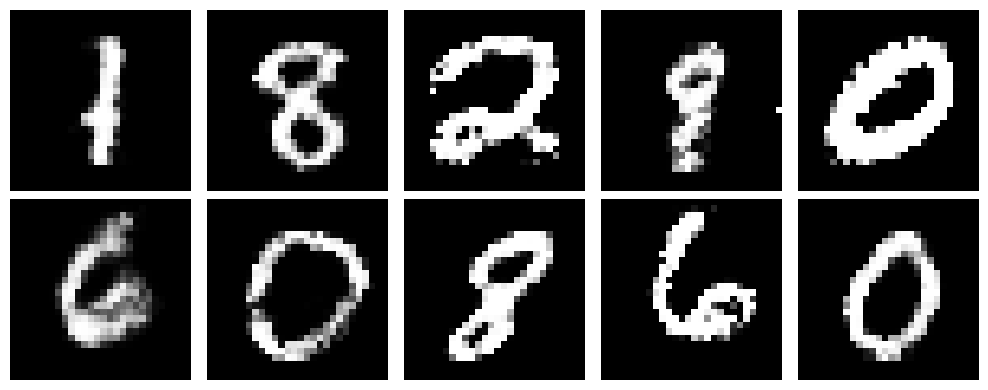

epoch: 86 loss generator: -1.1682 loss discriminator: -1.1826


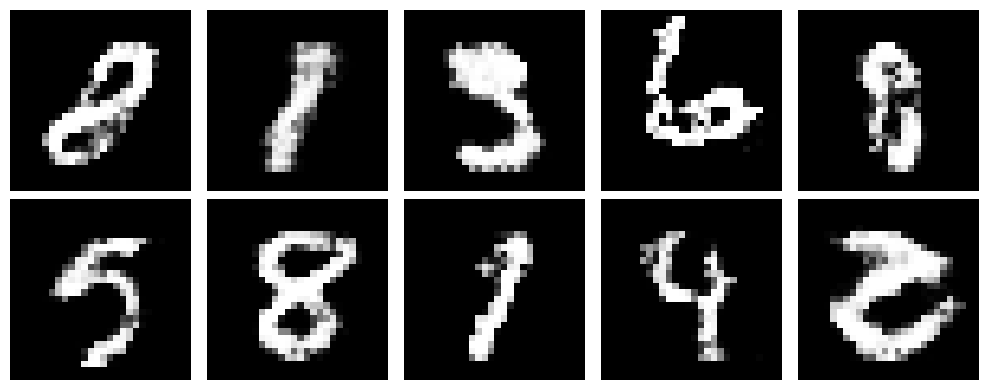

epoch: 87 loss generator: -1.1655 loss discriminator: -1.1775


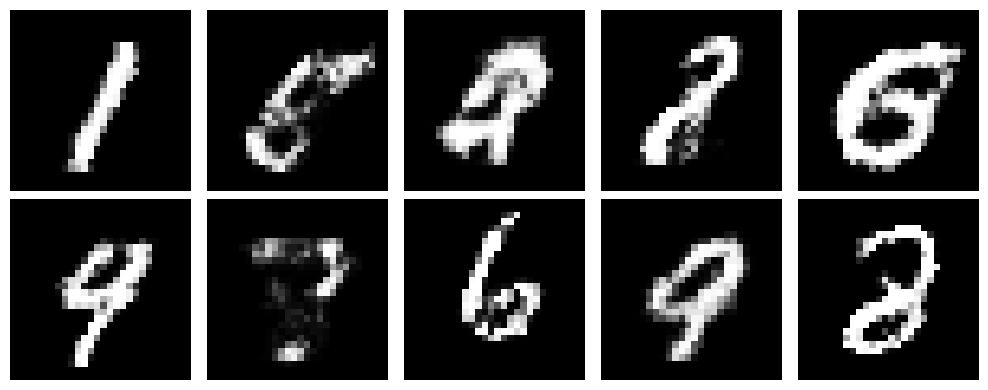

epoch: 88 loss generator: -1.1752 loss discriminator: -1.1732


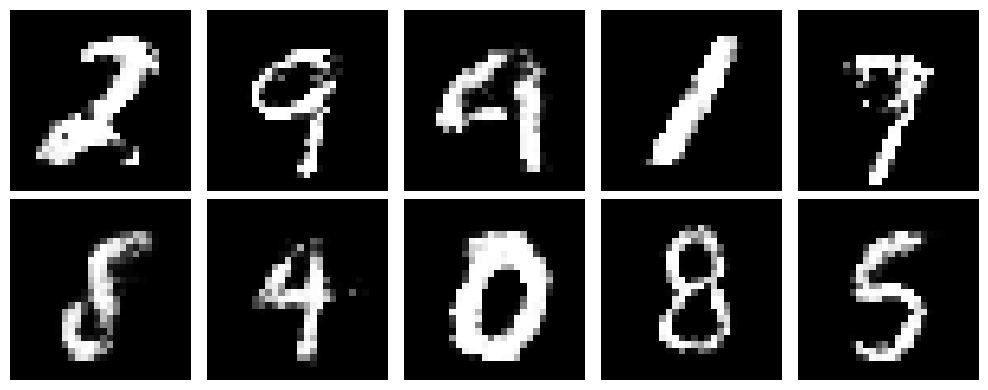

epoch: 89 loss generator: -1.1735 loss discriminator: -1.1750


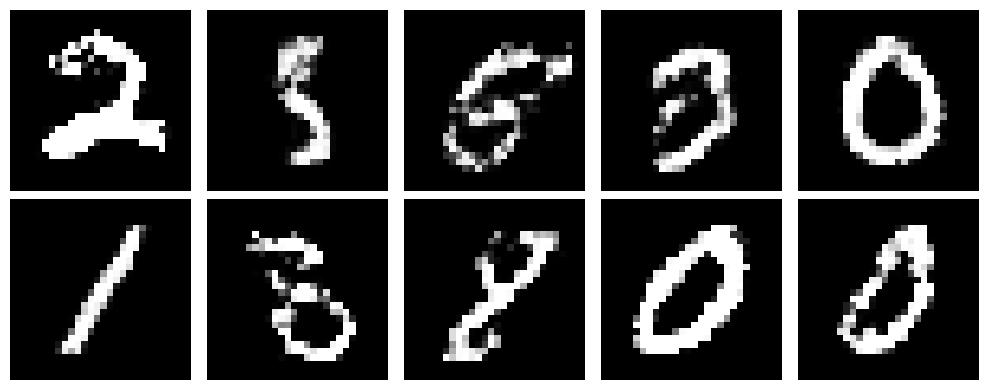

epoch: 90 loss generator: -1.1638 loss discriminator: -1.1772


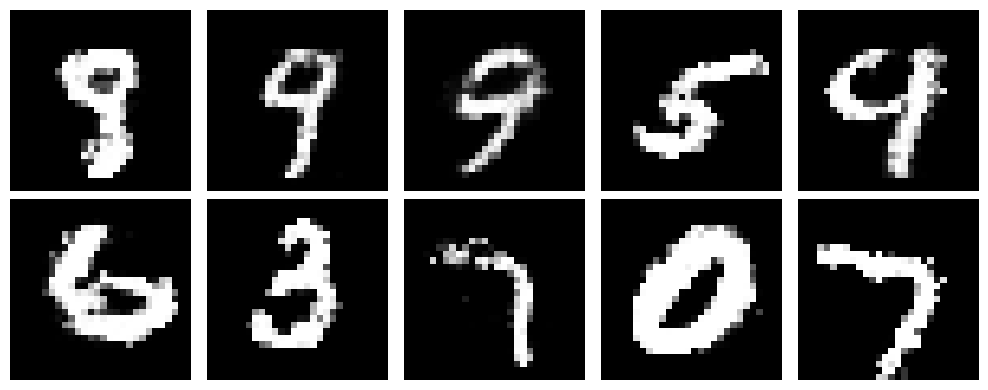

epoch: 91 loss generator: -1.1719 loss discriminator: -1.1746


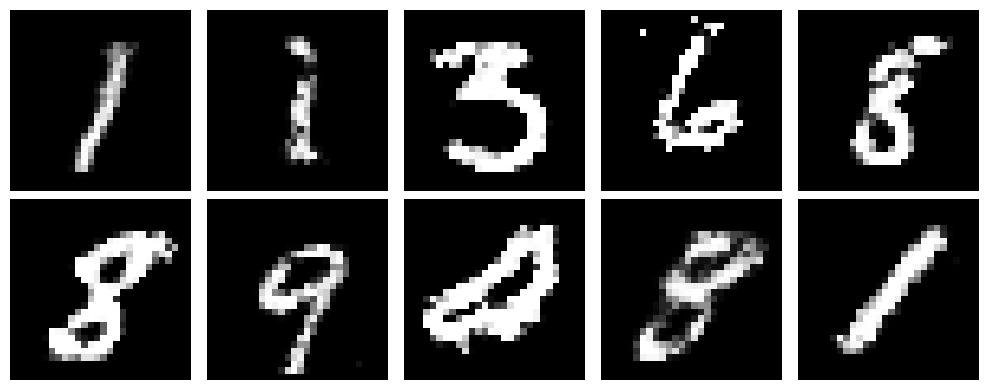

epoch: 92 loss generator: -1.1738 loss discriminator: -1.1756


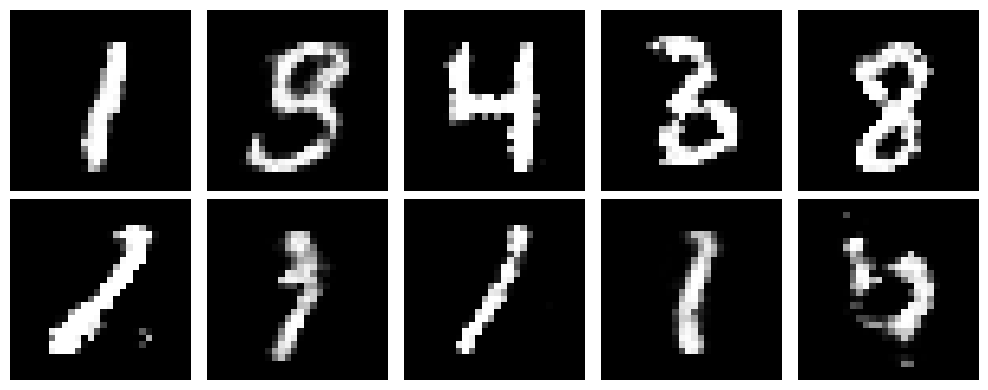

epoch: 93 loss generator: -1.1724 loss discriminator: -1.1783


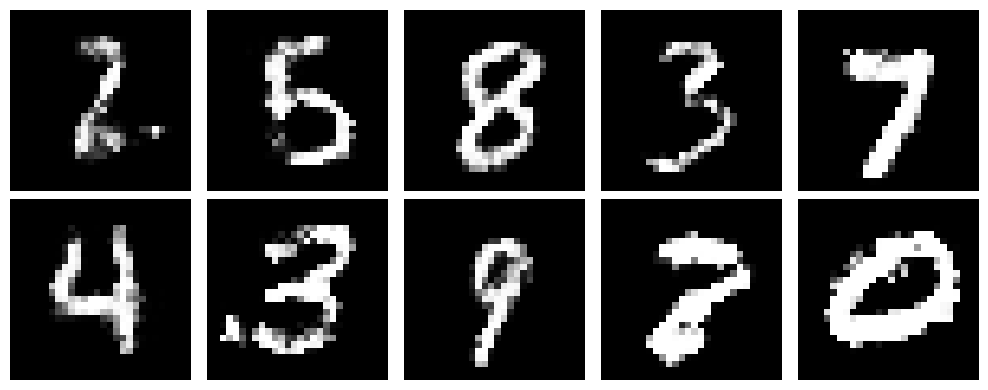

epoch: 94 loss generator: -1.1635 loss discriminator: -1.1789


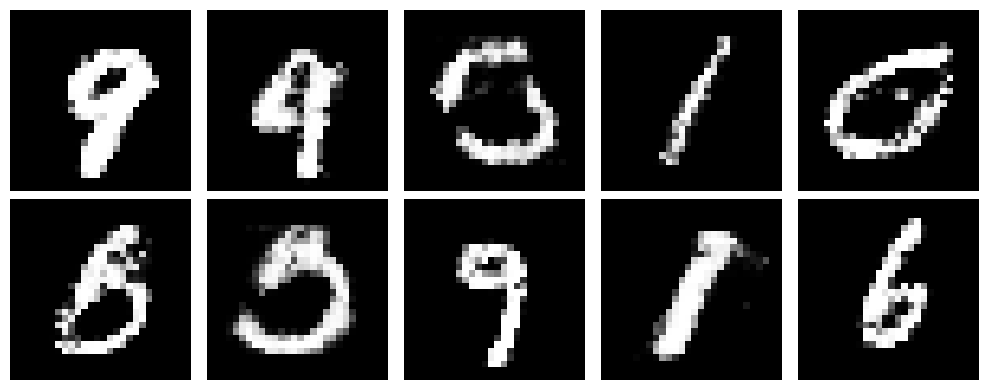

epoch: 95 loss generator: -1.1924 loss discriminator: -1.1707


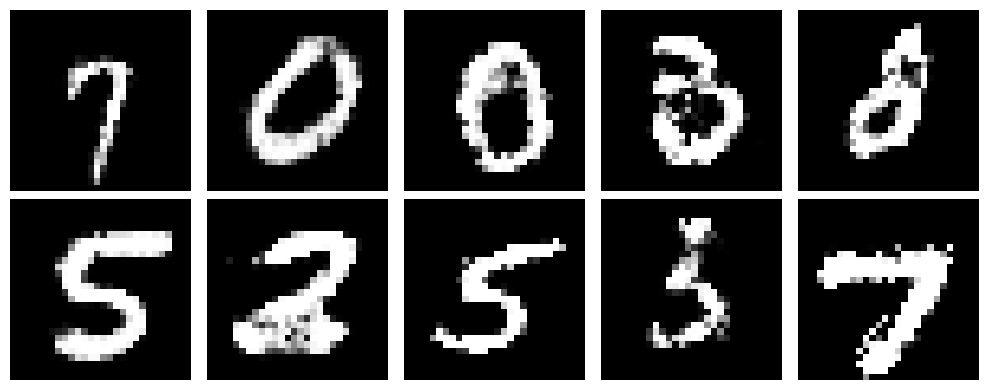

epoch: 96 loss generator: -1.1723 loss discriminator: -1.1801


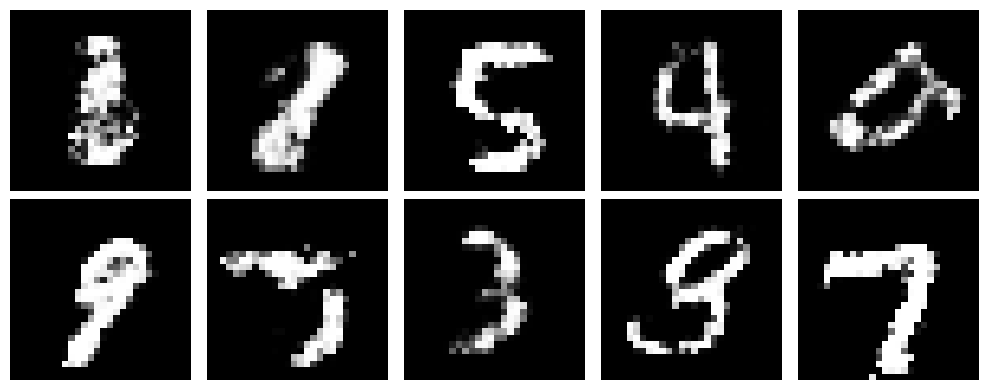

epoch: 97 loss generator: -1.1826 loss discriminator: -1.1722


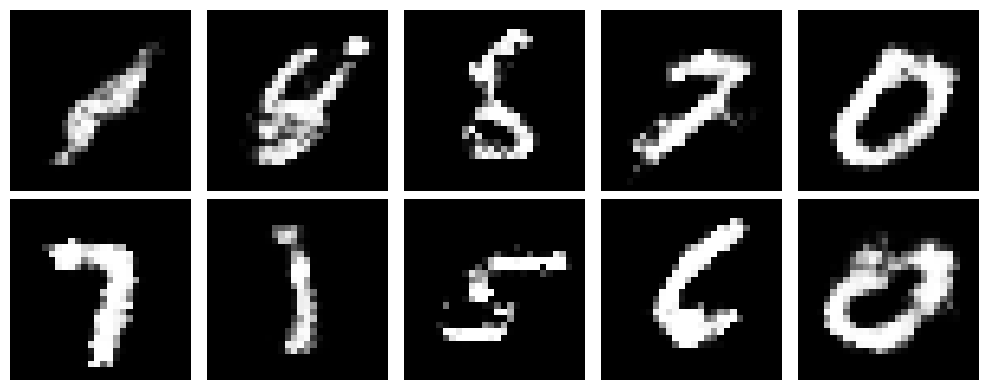

epoch: 98 loss generator: -1.1816 loss discriminator: -1.1695


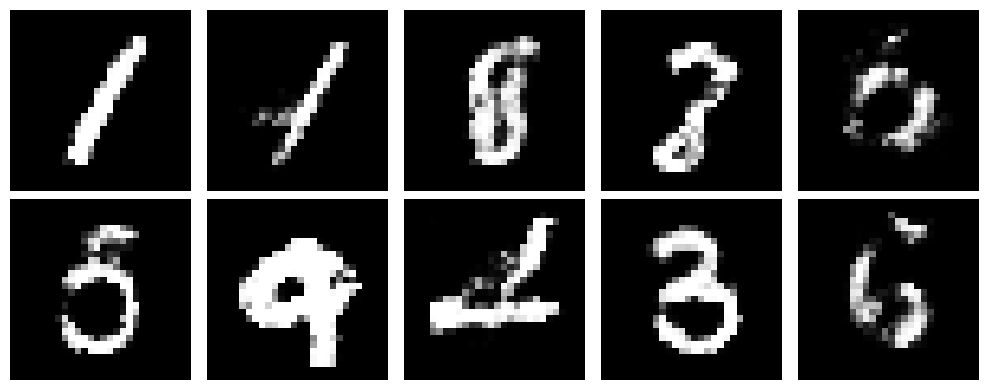

epoch: 99 loss generator: -1.1848 loss discriminator: -1.1686


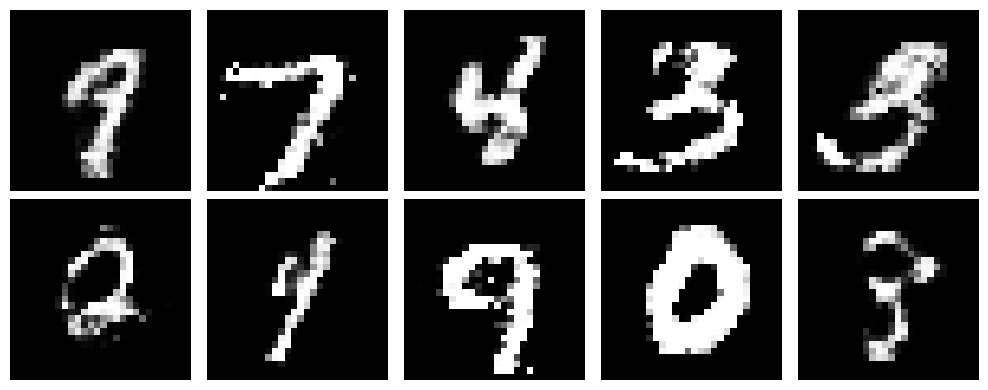

In [8]:
losses_D, losses_G = [], []
N = len(dataloader.dataset)
for epoch in range(epochs):

    total_loss_G, total_loss_D = 0.0, 0.0
    for x, _ in dataloader:
        # x is sampled from data generating distribution x ~ p_data
        x = x.to(device)

        # z is sampled from noise prior z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_x = D(x)
        D_G_z = D(G(z))

        # update descriminator by ascending its stochastic gradient
        optimizer_D.zero_grad()
        loss_d = criterion_D(D_x, D_G_z)
        loss_d.backward()
        optimizer_D.step()
        
        # z is sampled from noise prior
        # z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_G_z = D(G(z))

        # update generator by descending its stochastic gradient
        optimizer_G.zero_grad()
        loss_g = criterion_G(D_G_z)
        loss_g.backward()
        optimizer_G.step()

        total_loss_D += loss_d.item() * x.shape[0]
        total_loss_G += loss_g.item() * z.shape[0]
    losses_D.append(total_loss_D / N)
    losses_G.append(total_loss_G / N)

    if verbose: 
        print(f'epoch: {epoch} loss generator: {(total_loss_G/N):.4f} loss discriminator: {(total_loss_D/N):.4f}')

    # short visualization, to see, if it works :D
    save_plot(G, Z_noise, nrows_1, ncols_1, figsize_1, epoch) 
    
    fig, ax = plt.subplots(nrows_2, ncols_2, figsize=figsize_2)  
    # fig.subplots_adjust(wspace=0, hspace=0)
    ax = ax.flatten() 
    for i in range(nrows_2 * ncols_2):
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
        G_z = G(z)
        img = G_z.reshape(28, 28).detach().cpu().numpy()
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.tight_layout() 
    plt.show(fig) 

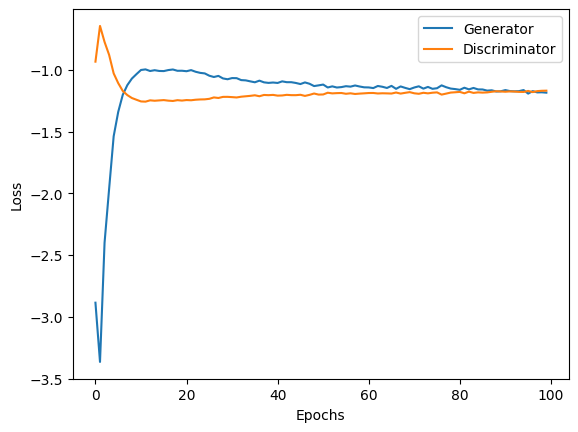

In [9]:
x = np.arange(len(losses_G))

_, ax = plt.subplots()
ax.plot(x, losses_G, label='Generator')
ax.plot(x, losses_D, label='Discriminator')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()